# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**

 - In a bank a big portion of the profits are customers paying interest on their loans, if the customer defaults in their payments, it affects negatively to the bank's interests. For such reason, it is important for the bank to decide whether a loan applicant is more or less likely to default if their loan is approved based on past data collected from their customer data base. Nowadays, the goal is to improve the efficiency in the decision making process by using machine learning algorithms.

### **The objective:**

 - The objective of this problem is to be able to estimate if a client will be likely to default on their loan or not based on information provided by the customer. This goal will be reached by building a classification model that allows to predict the likelyhood of a client to default.

### **The key questions:**

- What information is significant to predict the likelihood of a client to default?
- What is the expected acuracy of the model?
- Which classification method is more efficient for this problem?
- What recommendations can be given to the bank?

### **The problem formulation**:

- We will goal to increase the accuracy of the decision-making process by using a machine learning model to predict whether a loan applicant  is likely to default or not based on their information and historical data from pasts customers.

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Executive Summary**

Nowadays, banks face a significant challenge in managing the risk associated with home loans, which is a major source of profit for their bussiness. The overall objective of this project is improving the desicion making process by utilizing machine learning algorithms like Desicion Tree, Logistic Regression and Random Forest to boost efficiency and minimize human error and bias in the loan approval process. 

Through testing and evaluating these different methods, the final solution proposes to the bank to use the Tuned Random Forest algorithm which displays a promising solution, demonstrating superior performance in predicting loan default likelihood than the other models. Its high recall (83.83%), accuracy (90.77%), and K-5 cross-validation (88.82%) metrics indicate its efficacy in identifying potential defaulters, thus mitigating risk for the bank. 

Additionally, It is recommended to periodically retrain the model with current data and to improve the data collecting process to lower the missing values quantity.

## **Import the necessary libraries and Data**

In [1]:
# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

In [2]:
# Importing Main Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Libraries to scale the data using z-score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Importing the Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn import tree;
from sklearn.tree import DecisionTreeClassifier;
from sklearn.ensemble import RandomForestClassifier;

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score

# For tuning the model
from sklearn.model_selection import GridSearchCV

## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

In [3]:
#Loading Data
df_hmeq = pd.read_csv('hmeq.csv');
data=df_hmeq.copy()

In [4]:
df_hmeq.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN

In [5]:
df_hmeq.tail()

BAD   LOAN  MORTDUE    VALUE   REASON    JOB   YOJ  DEROG  DELINQ  \
5955    0  88900  57264.0  90185.0  DebtCon  Other  16.0    0.0     0.0   
5956    0  89000  54576.0  92937.0  DebtCon  Other  16.0    0.0     0.0   
5957    0  89200  54045.0  92924.0  DebtCon  Other  15.0    0.0     0.0   
5958    0  89800  50370.0  91861.0  DebtCon  Other  14.0    0.0     0.0   
5959    0  89900  48811.0  88934.0  DebtCon  Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
5955  221.808718   0.0  16.0  36.112347  
5956  208.692070   0.0  15.0  35.859971  
5957  212.279697   0.0  15.0  35.556590  
5958  213.892709   0.0  16.0  34.340882  
5959  219.601002   0.0  16.0  34.571519

In [6]:
df_hmeq.shape

(5960, 13)

- This dataset has 5,960 rows and 13 columns. It is very large containing information of nearly six thousand clients.

In [7]:
#Data Types
df_hmeq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


- There is one independent variable `BAD` which is a categorical variable already encoded as numerical, indicating 1 when the client defaults and 0 otherwise.
- There are two categorical variables (`REASON` & `JOB`).
- There are ten numerical variables, for example `LOAN`,`MORTDUE`,`VALUE`,`YOJ`,etc.

In [8]:
#Missing Values
df_hmeq.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [9]:
MV=df_hmeq.isnull().sum()*100/df_hmeq.shape[0]
MV

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

<AxesSubplot:>

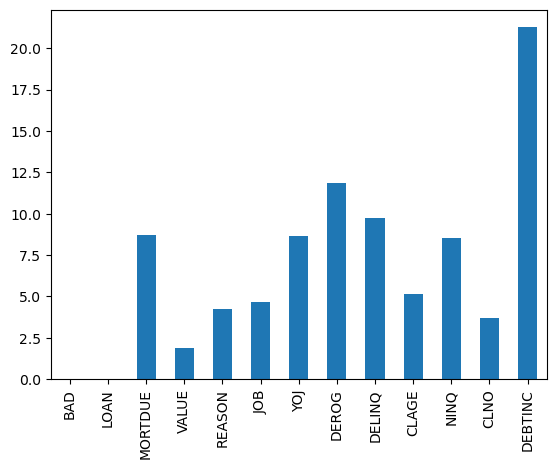

In [10]:
MV.plot.bar()

- This dataset has eleven variables with missing values. The only variables that don't have missing values are `BAD` & `LOAN`.
- The variable with the highest percentage of missing values is `DEBTINC` and the one with the lowest percentage is `VALUE`. A possible reason why there are so many missing values in "Debt to Income" might be because to calculate this ratio the client must inform of all debt obligations and monthly income, which is sensible information that not all the customers would be open to provide.
- If the missing values of the `DEBTINC` variable were to be randomly filled out, that may generate a bias in the machine learning model.

In [11]:
#Duplicated Values
df_hmeq.duplicated().sum()

0

- This dataset does not have any duplicated values.

In [12]:
#Unique Values
df_hmeq.nunique()

BAD           2
LOAN        540
MORTDUE    5053
VALUE      5381
REASON        2
JOB           6
YOJ          99
DEROG        11
DELINQ       14
CLAGE      5314
NINQ         16
CLNO         62
DEBTINC    4693
dtype: int64

- There is not a variable that can be considered as an identifier in this dataset.
- There are two categories in `REASON` & six in `JOB`. Dummy variables will be created to address the categorical variables down in this document.

## Summary Statistics

In [13]:
#Changing categorical data type from 'object' to 'category'
cols = df_hmeq.select_dtypes(['object']).columns.tolist()
cols.append('BAD')

for i in cols:
    df_hmeq[i] = df_hmeq[i].astype('category')

df_hmeq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


In [14]:
#Statistical Summary (Numerical Variables)
df_hmeq.describe().T

count           mean           std          min           25%  \
LOAN     5960.0   18607.969799  11207.480417  1100.000000  11100.000000   
MORTDUE  5442.0   73760.817200  44457.609458  2063.000000  46276.000000   
VALUE    5848.0  101776.048741  57385.775334  8000.000000  66075.500000   
YOJ      5445.0       8.922268      7.573982     0.000000      3.000000   
DEROG    5252.0       0.254570      0.846047     0.000000      0.000000   
DELINQ   5380.0       0.449442      1.127266     0.000000      0.000000   
CLAGE    5652.0     179.766275     85.810092     0.000000    115.116702   
NINQ     5450.0       1.186055      1.728675     0.000000      0.000000   
CLNO     5738.0      21.296096     10.138933     0.000000     15.000000   
DEBTINC  4693.0      33.779915      8.601746     0.524499     29.140031   

                  50%            75%            max  
LOAN     16300.000000   23300.000000   89900.000000  
MORTDUE  65019.000000   91488.000000  399550.000000  
VALUE    89235.500000  119824.250000  855909.000000  
YOJ          7.000000      13.000000      41.000000  
DEROG        0.000000       0.000000      10.000000  
DELINQ       0.000000       0.000000      15.000000  
CLAGE      173.466667     231.562278    1168.233561  
NINQ         1.000000       2.000000      17.000000  
CLNO        20.000000      26.000000      71.000000  
DEBTINC     34.818262      39.003141     203.312149

In [15]:
#Statistical Summary (Categorical Variables)
df_hmeq.describe(include=['category']).T

count unique      top  freq
BAD     5960      2        0  4771
REASON  5708      2  DebtCon  3928
JOB     5681      6    Other  2388

- The average due on a existing mortgage is $73,760.8$, while the average property value is $101,776.04$ and the loan amount is $18,607.97$
- The top reason for the loan request is Debt Consolidation.
- In average the Debt to Income ratio is around 34.

## **Exploratory Data Analysis (EDA) and Visualization**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

### **Univariate Analysis**


In [16]:
# Defining the hist_box() function
def hist_box(df, col):
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(15,10))
  sns.set(style='darkgrid')
  # Adding a graph in each part
  sns.boxplot(x=df[col], ax=ax_box, showmeans=True)
  sns.distplot(df[col], ax=ax_hist)
  ax_hist.axvline(df[col].mean(), color='green', linestyle='--') # Green line corresponds to the mean in the plot
  ax_hist.axvline(df[col].median(), color='orange', linestyle='-') # Orange line corresponds to the median in the plot
  plt.show()

In [17]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage    
    plt.show() # show the plot

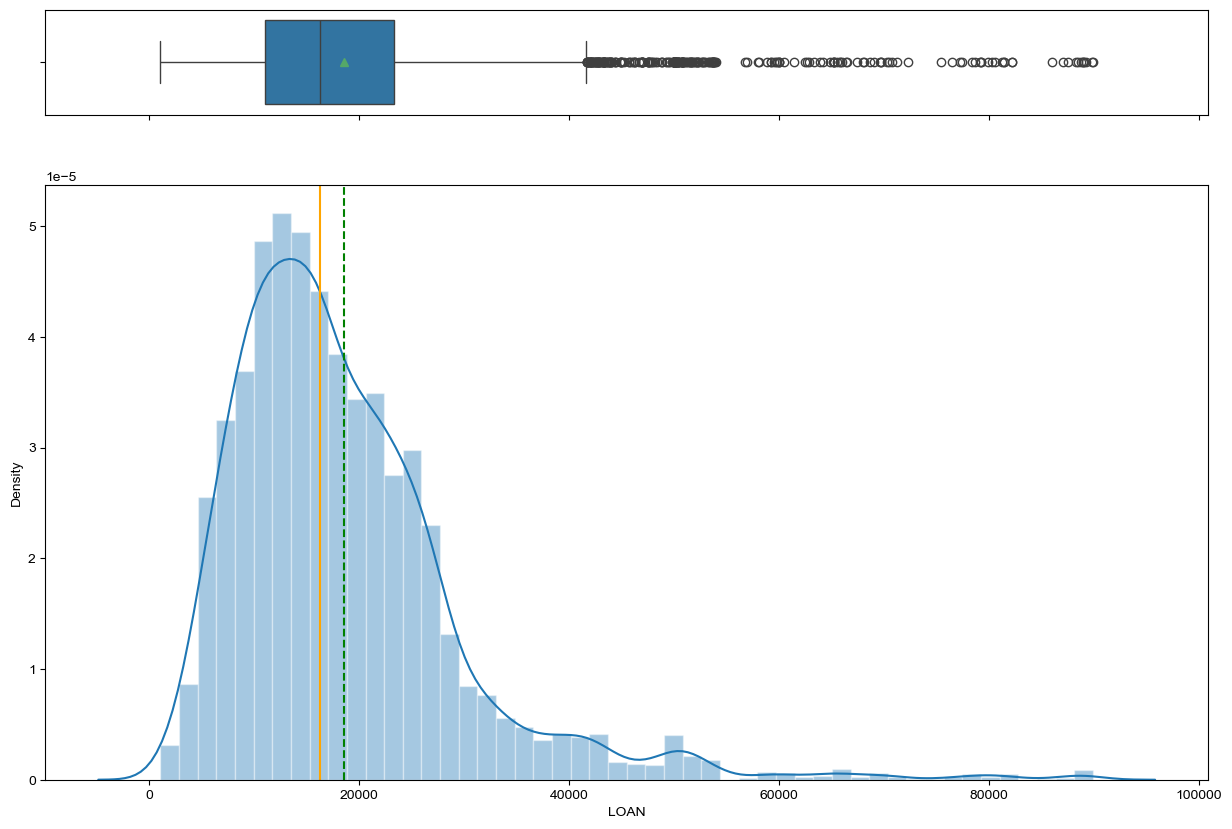

In [18]:
hist_box(df_hmeq,'LOAN')

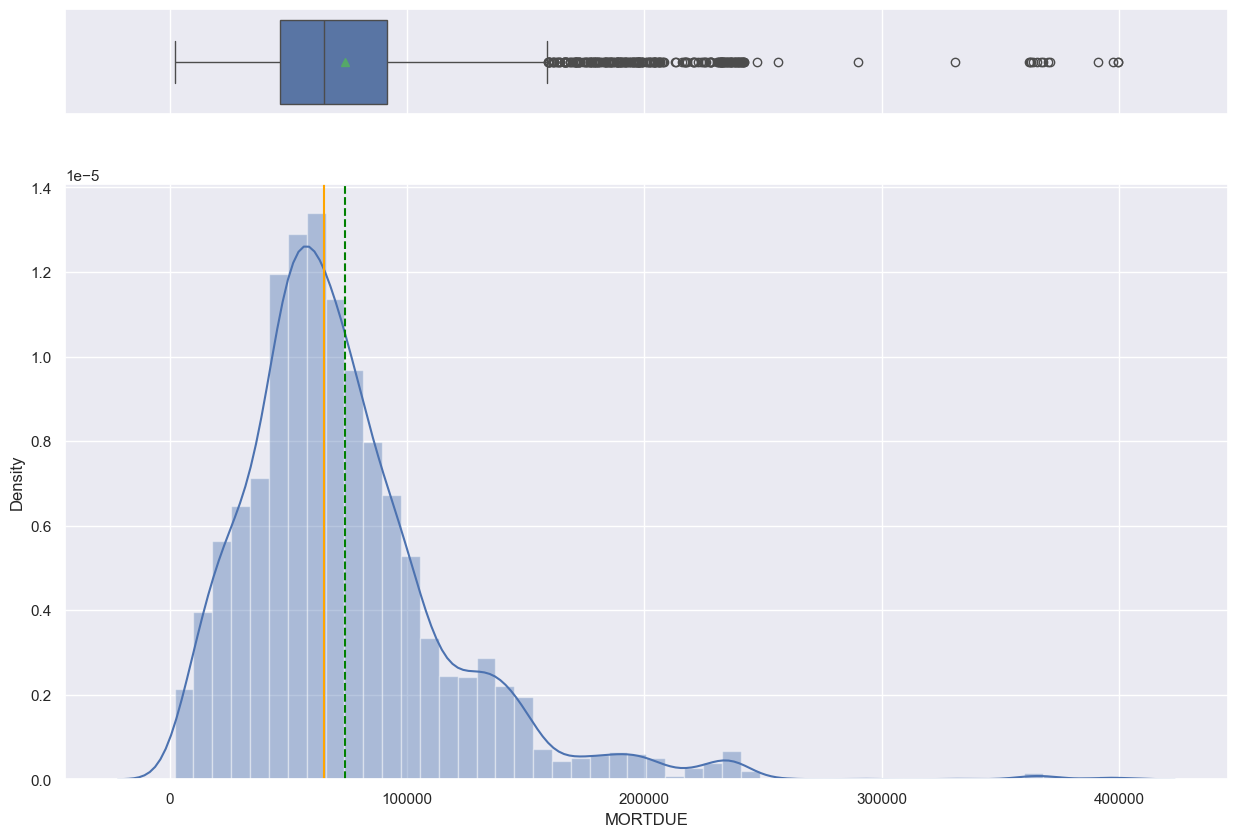

In [19]:
hist_box(df_hmeq,'MORTDUE')

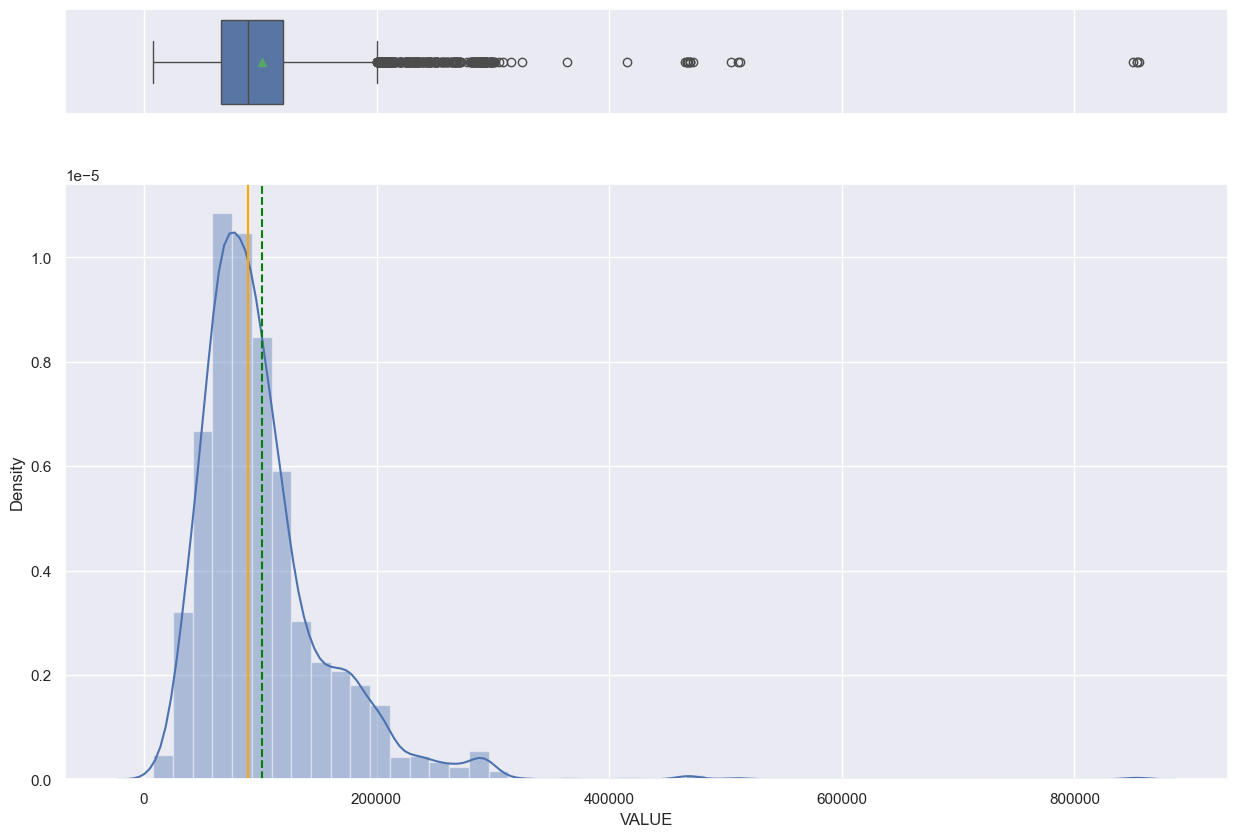

In [20]:
hist_box(df_hmeq,'VALUE')

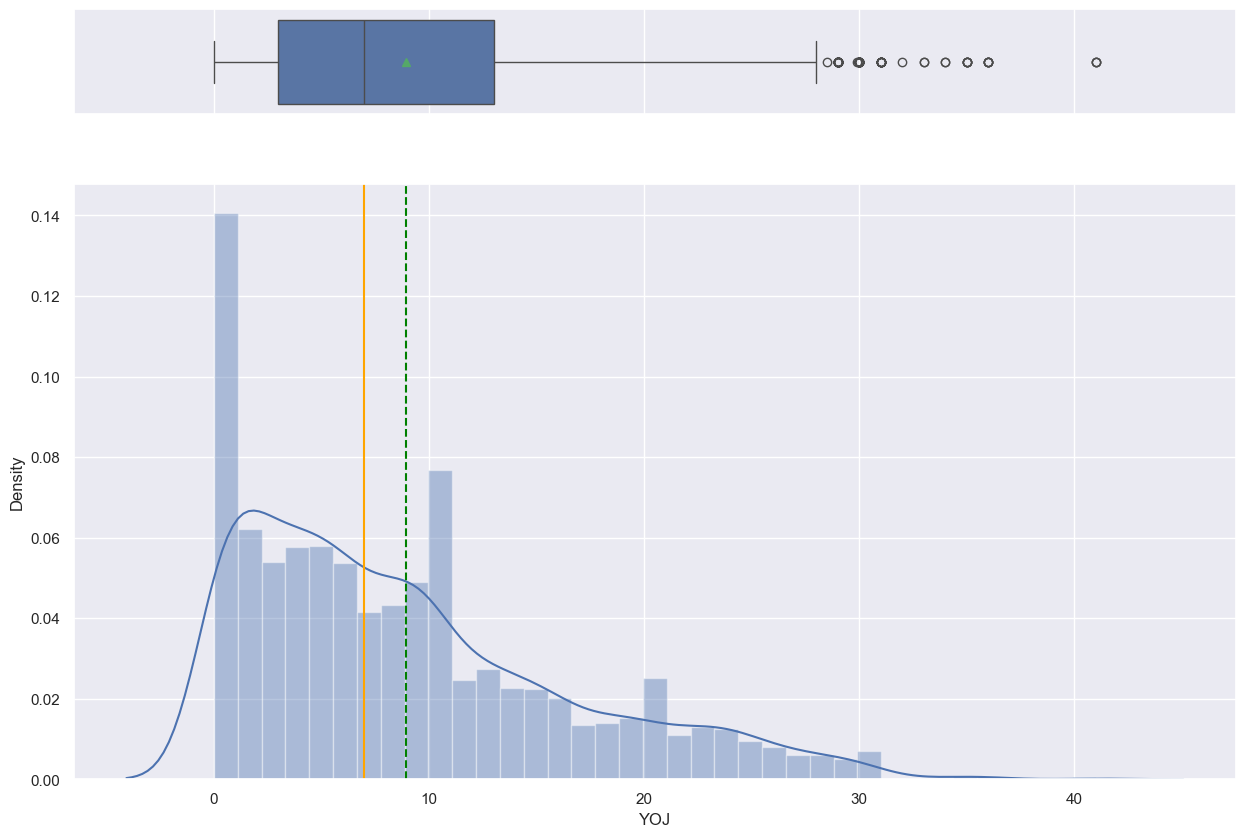

In [21]:
hist_box(df_hmeq,'YOJ')

- The `LOAN` variable values are within the (1,100 - 89,900) Range.
- The distribution plot shows that the `LOAN`,`MORTDUE` & `VALUE` variables have a normal distribution and are right-skewed.
- The `YOJ` variable distribution plot seems to be right-skewed with a negative kurtosis.

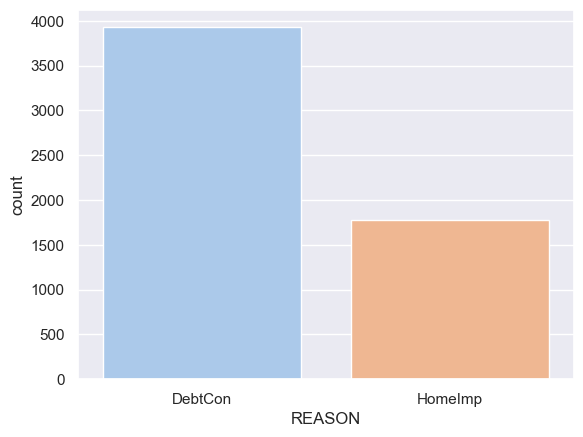

In [22]:
sns.countplot(data=df_hmeq,x='REASON',palette='pastel')
plt.xticks()
plt.show()

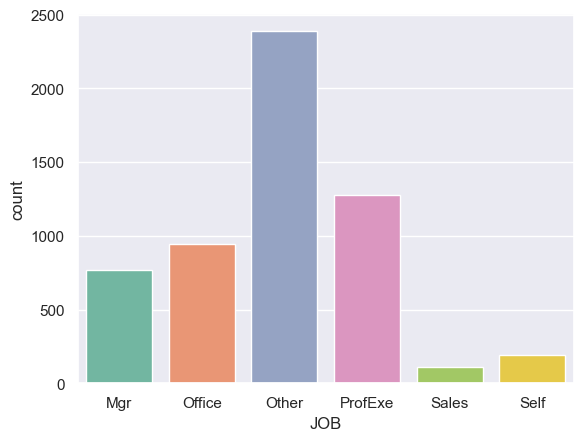

In [23]:
sns.countplot(data=df_hmeq,x='JOB',palette='Set2')
plt.xticks()
plt.show()

- The `REASON` variable has two categories and the most common reason to request a loan is Debt Consolidation.
- The `JOB` variable has six categories being the most common one "Other" and the rarest one "Sales".

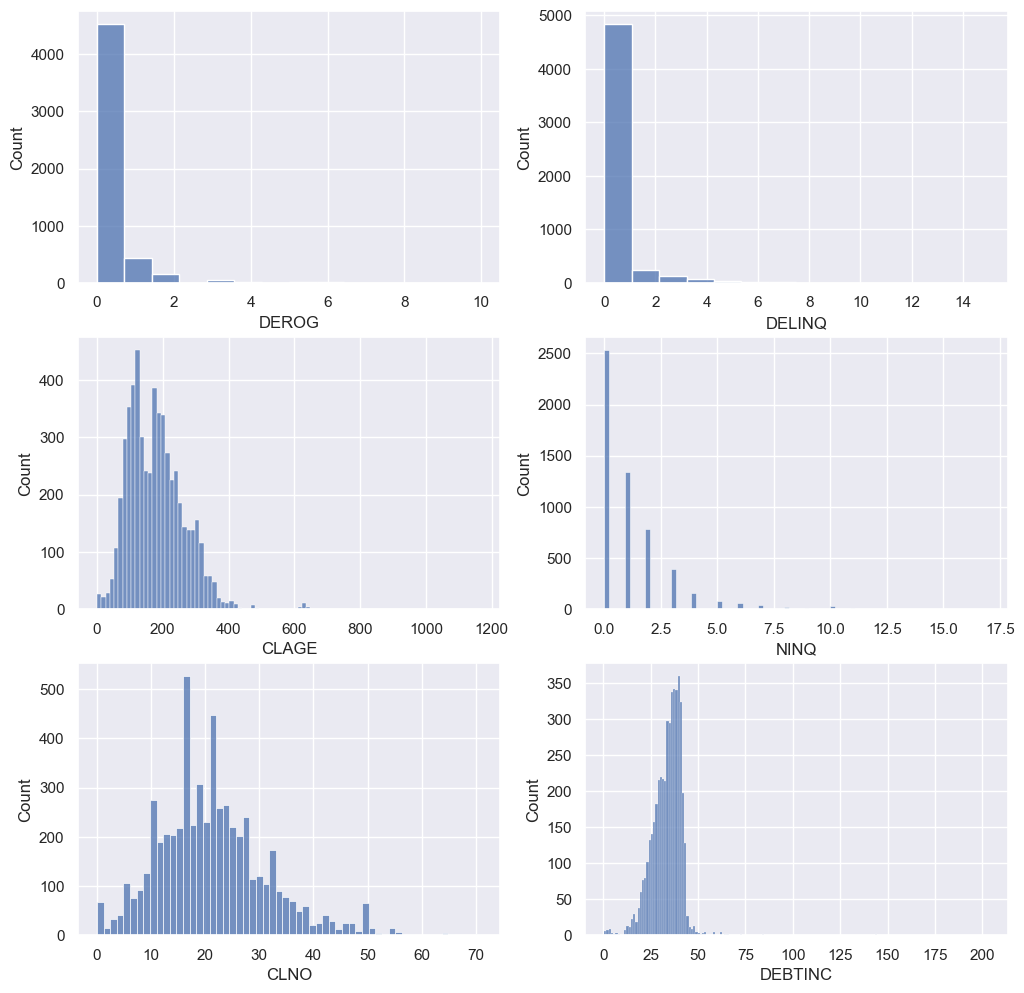

In [24]:
fig, ax =plt.subplots(3,2,figsize=(12, 12))
sns.histplot(x=df_hmeq["DEROG"],ax=ax[0][0])
sns.histplot(x=df_hmeq["DELINQ"],ax=ax[0][1])
sns.histplot(x=df_hmeq["CLAGE"],ax=ax[1][0])
sns.histplot(x=df_hmeq["NINQ"],ax=ax[1][1])
sns.histplot(x=df_hmeq["CLNO"],ax=ax[2][0])
sns.histplot(x=df_hmeq["DEBTINC"],ax=ax[2][1])
fig.show()

- The `CLAGE` and `CLNO` variables distributions seem to follow the pattern of a normal distribution.
- The `DEROG`, `DELINQ` & `NING` are right-skewed, with the majority of data oscilating in the lower values.

### **Bivariate Analysis**

<AxesSubplot:xlabel='VALUE', ylabel='MORTDUE'>

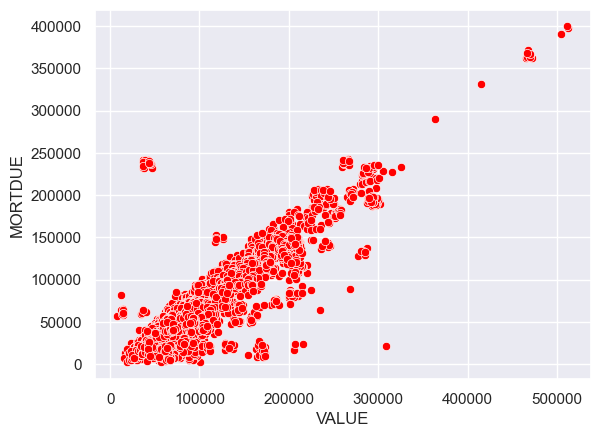

In [25]:
#Bivariate Analysis between two numerical variables

sns.scatterplot(df_hmeq,x="VALUE",y="MORTDUE",color=['red'])

- There is a strong positive correlation between the variables `VALUE` and `MORTDUE`.

In [26]:
#Bivariate Analysis with Categorical Variables
dict_BAD = {1:'Yes', 0:'No'}
BAD = df_hmeq.BAD.map(dict_BAD)

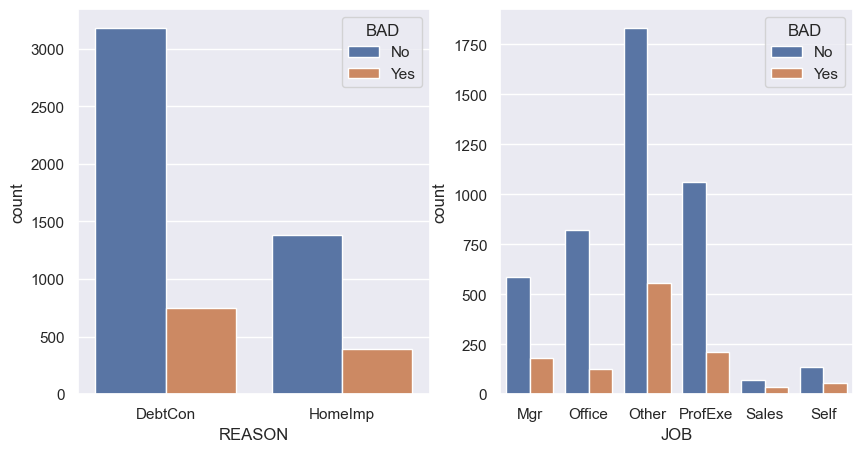

In [27]:
fig, ax =plt.subplots(1,2,figsize=(10, 5))
sns.countplot(x=df_hmeq['REASON'],hue=BAD,ax=ax[0])
sns.countplot(x=df_hmeq['JOB'],hue=BAD,ax=ax[1])
fig.show()

In [28]:
tab1_percentage=round(pd.crosstab(df_hmeq['REASON'],BAD,margins=True,normalize='index')*100,2)
tab1_percentage

BAD         No    Yes
REASON               
DebtCon  81.03  18.97
HomeImp  77.75  22.25
All      80.01  19.99

- Both categories of `REASON`, Debt consolidation and Home Improvement have around the same percentage of clients defaulting which means that there is not a high correlation between the variables.

In [29]:
tab2_percentage=round(pd.crosstab(df_hmeq['JOB'],BAD,margins=True,normalize='index')*100,2)
tab2_percentage

BAD         No    Yes
JOB                  
Mgr      76.66  23.34
Office   86.81  13.19
Other    76.80  23.20
ProfExe  83.39  16.61
Sales    65.14  34.86
Self     69.95  30.05
All      79.48  20.52

- In the categories of `JOB` the percentages oscillate between 65% and 87% of clients not defaulting in their loans.
- There is not strong evidence of correlation between the type of job and the likelyhood of the customer to defult.

### **Multivariate Analysis**

<AxesSubplot:>

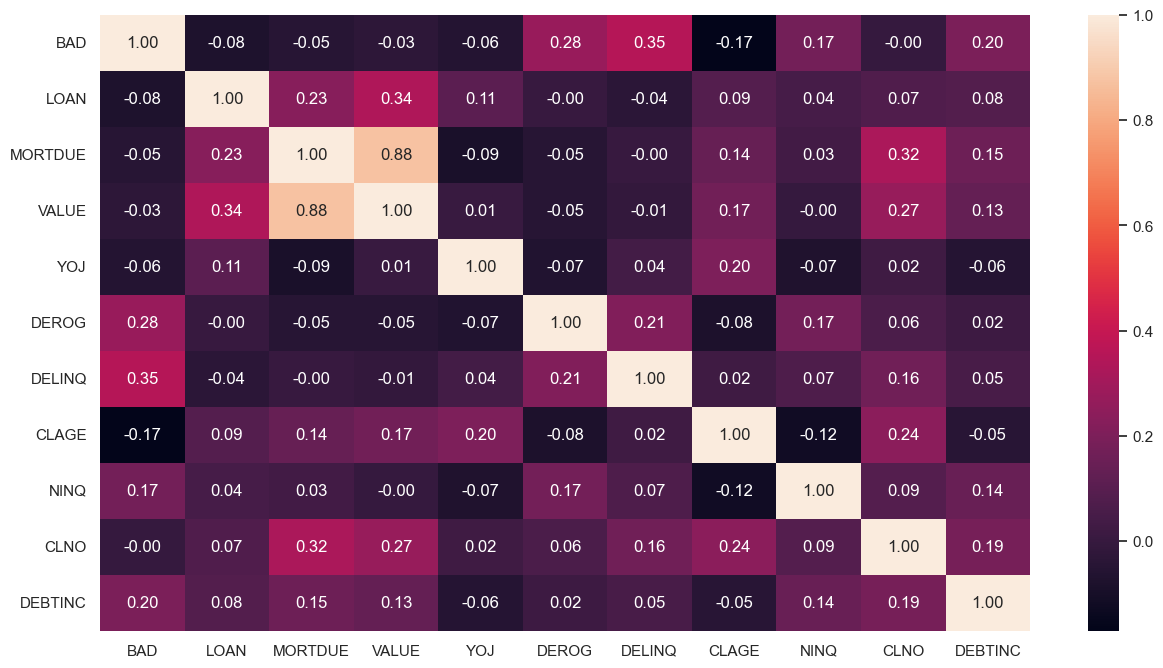

In [30]:
#Heatmap for numerical variables
num_cols = ['BAD','LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ','CLAGE',
                   'NINQ','CLNO','DEBTINC']

plt.figure(figsize = (15, 8))
sns.heatmap(df_hmeq[num_cols].corr(), annot = True, fmt = '0.2f', cmap = 'rocket')

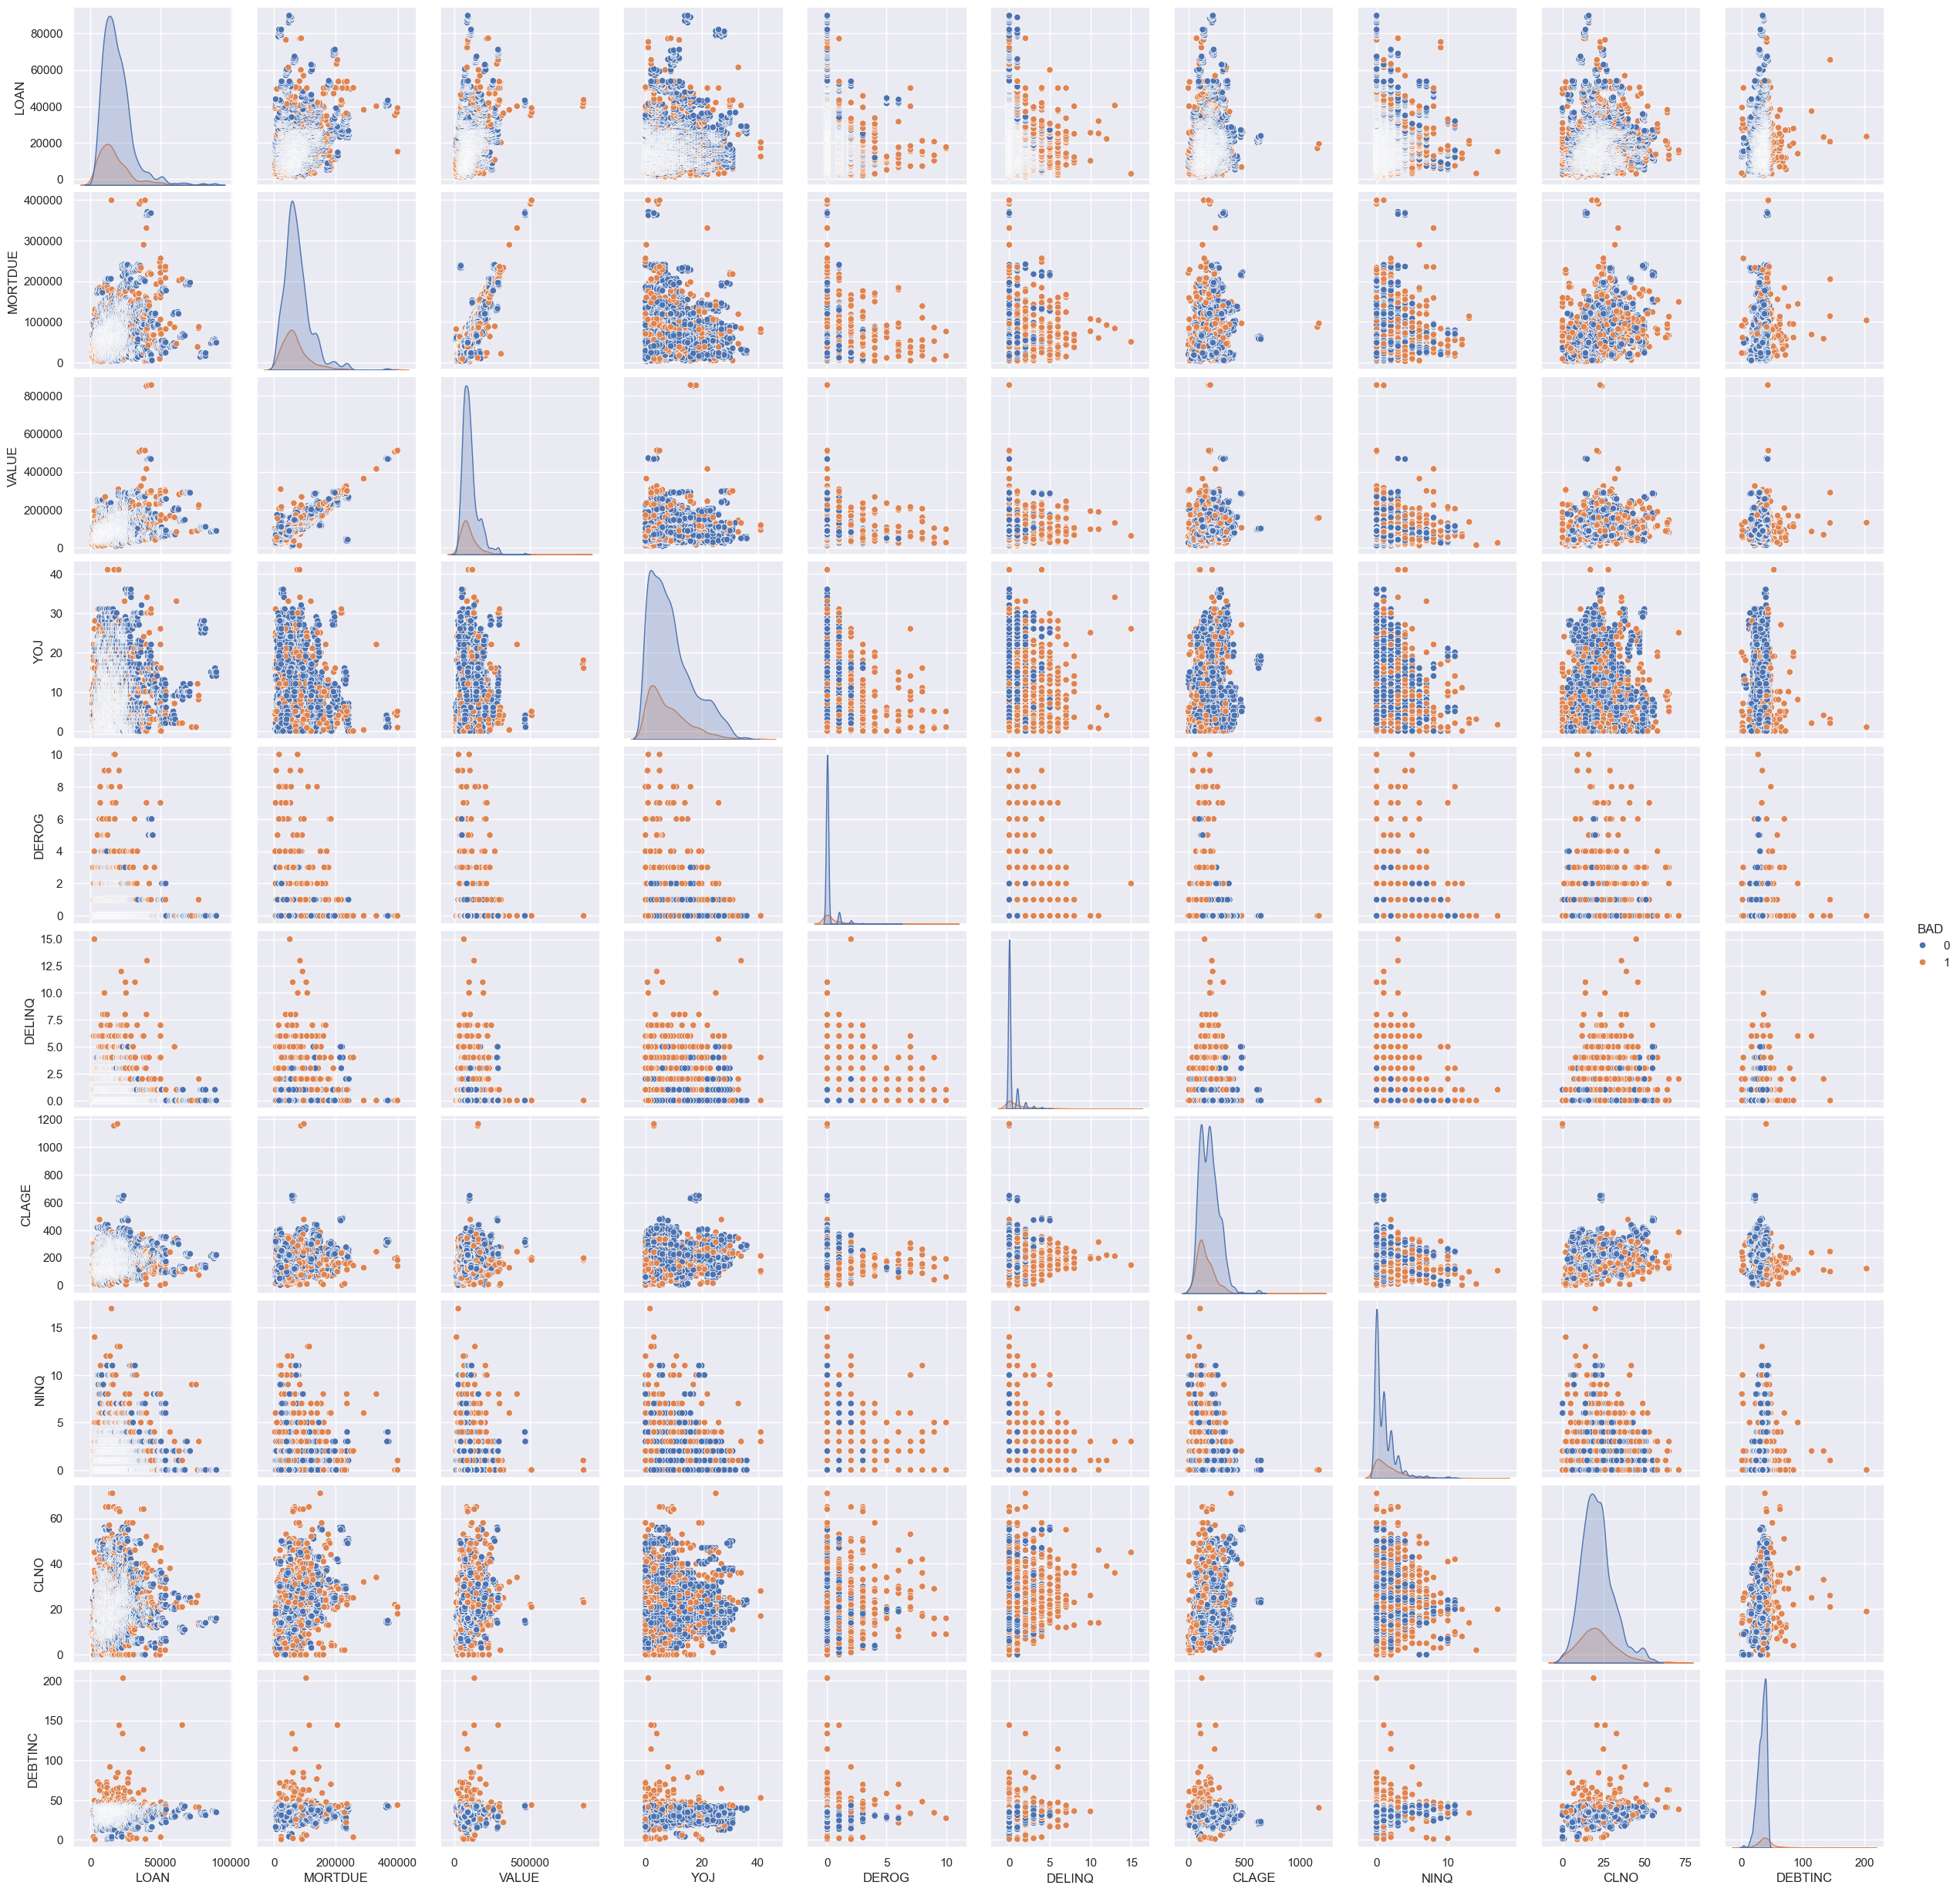

In [31]:
#Pairplot between numerical variables and 'BAD'
sns.pairplot(df_hmeq, hue='BAD')

- The `DEROG` and `DELINQ` variables have the highest correlation with the variable `BAD` than any other numerical variable.
- The variables `VALUE` and `MORTDUE`have the highest correlation between two variables. This suggests that is likely that the more value a property has, the higher the chance that the mortage due will also be greater.

## Treating Outliers

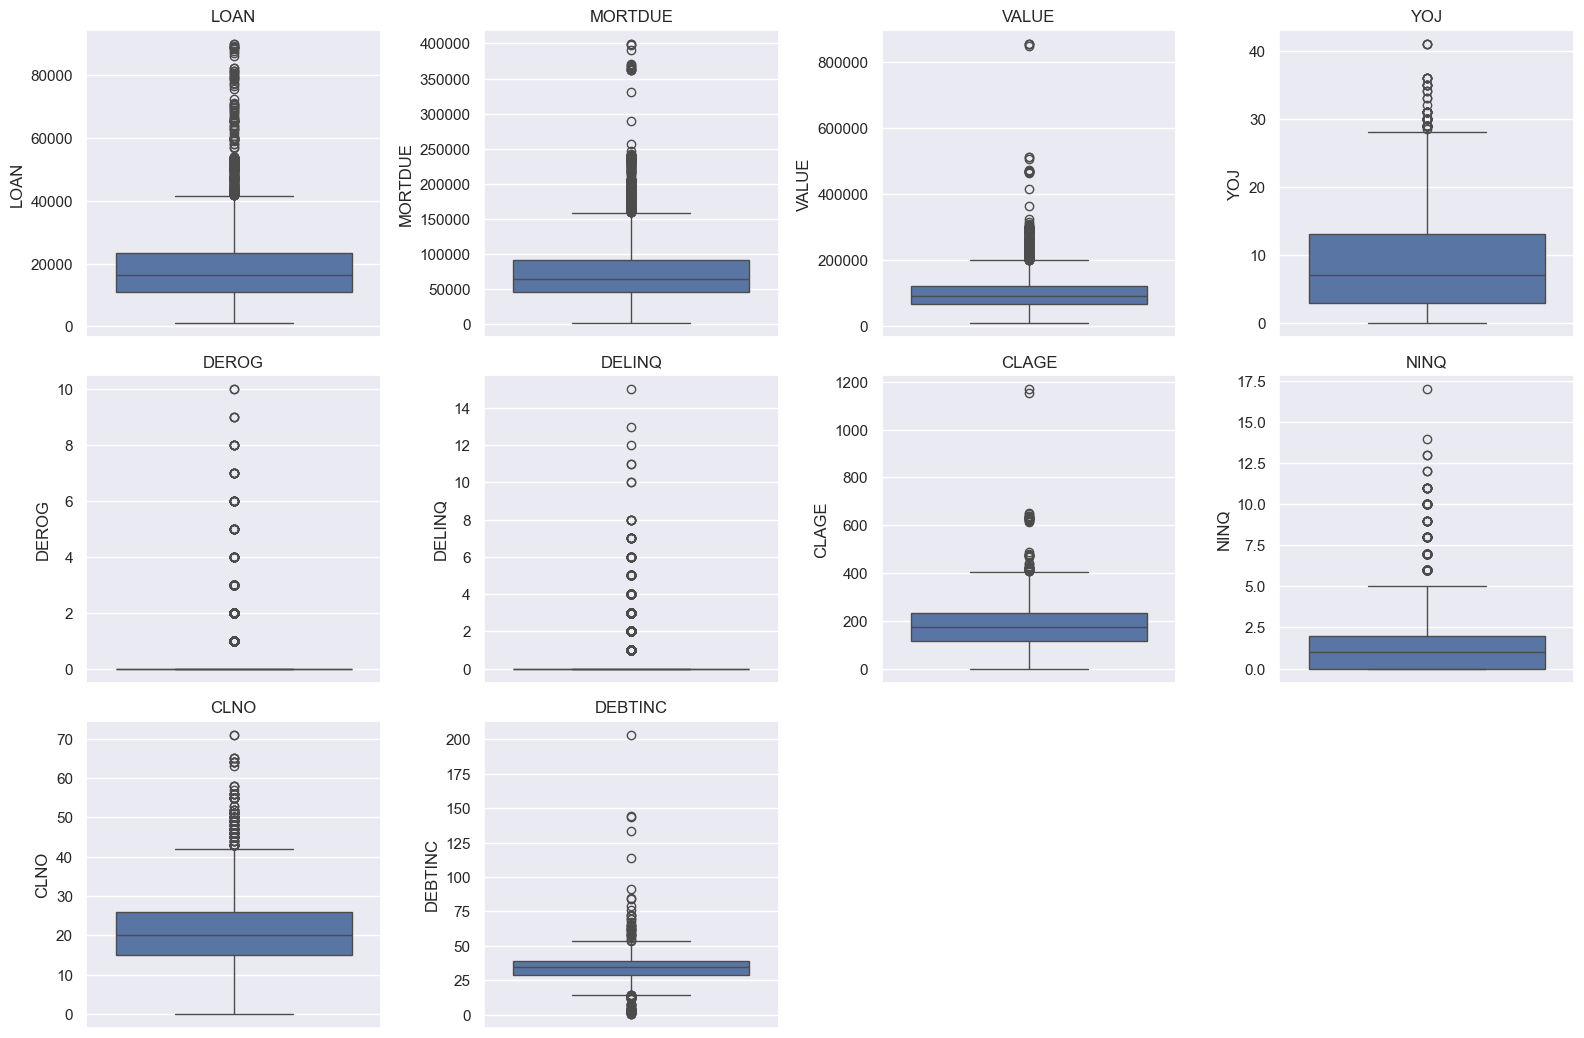

In [32]:
# outlier detection using boxplot
# selecting the numerical columns of data and adding their names in a list 
numeric_columns = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ','CLAGE',
                   'NINQ','CLNO', 'DEBTINC']
plt.figure(figsize=(16, 14))

for i, variable in enumerate(numeric_columns):
    
    plt.subplot(4, 4, i + 1)
    sns.boxplot(df_hmeq[variable])
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [33]:
#Finding the percentage of outliers for each numerical variable

Q1 = df_hmeq[numeric_columns].quantile(0.25)
Q3 = df_hmeq[numeric_columns].quantile(0.75)
IQR = Q3 - Q1                  
lower_whisker = Q1 - 1.5*IQR   
upper_whisker = Q3 + 1.5*IQR

((df_hmeq[numeric_columns] < lower_whisker) | (df_hmeq[numeric_columns] > upper_whisker)).sum()/data.shape[0]*100

LOAN        4.295302
MORTDUE     3.926174
VALUE       5.369128
YOJ         1.526846
DEROG      12.164430
DELINQ     20.151007
CLAGE       0.788591
NINQ        2.969799
CLNO        3.674497
DEBTINC     1.577181
dtype: float64

- Analizing the Boxplots and the percentage of outliers per variable, it is concluded that the variables `DEROG` & `DELINQ` have a high number of outliers in their data 12.16% & 20.15% respectively. If we were to treat the outliers in those variables we would be losing a big portion of information.

- Conversely, variables like `CLAGE`, `YOJ` & `DEBTINC` may be treated without loosing more than 2% of the data.

In [34]:
#Function to treat outliers

def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)

    return df

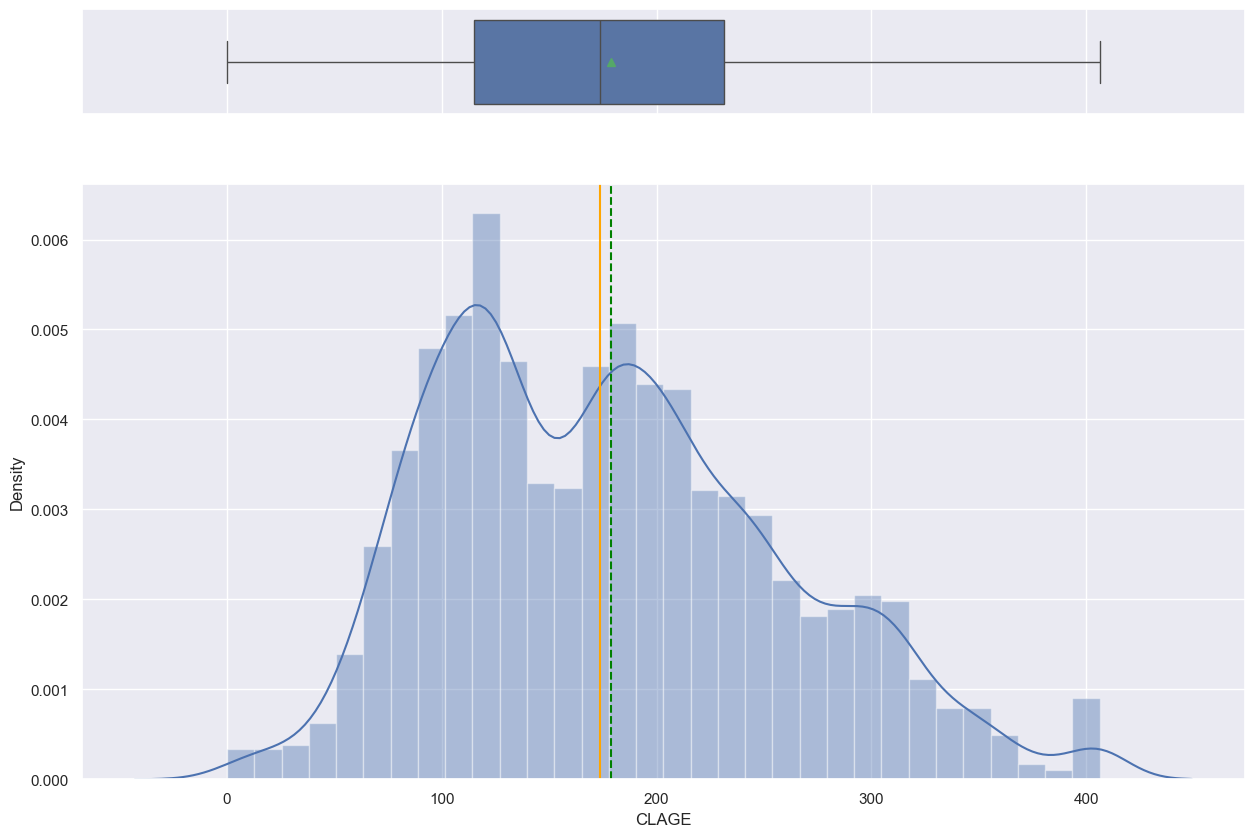

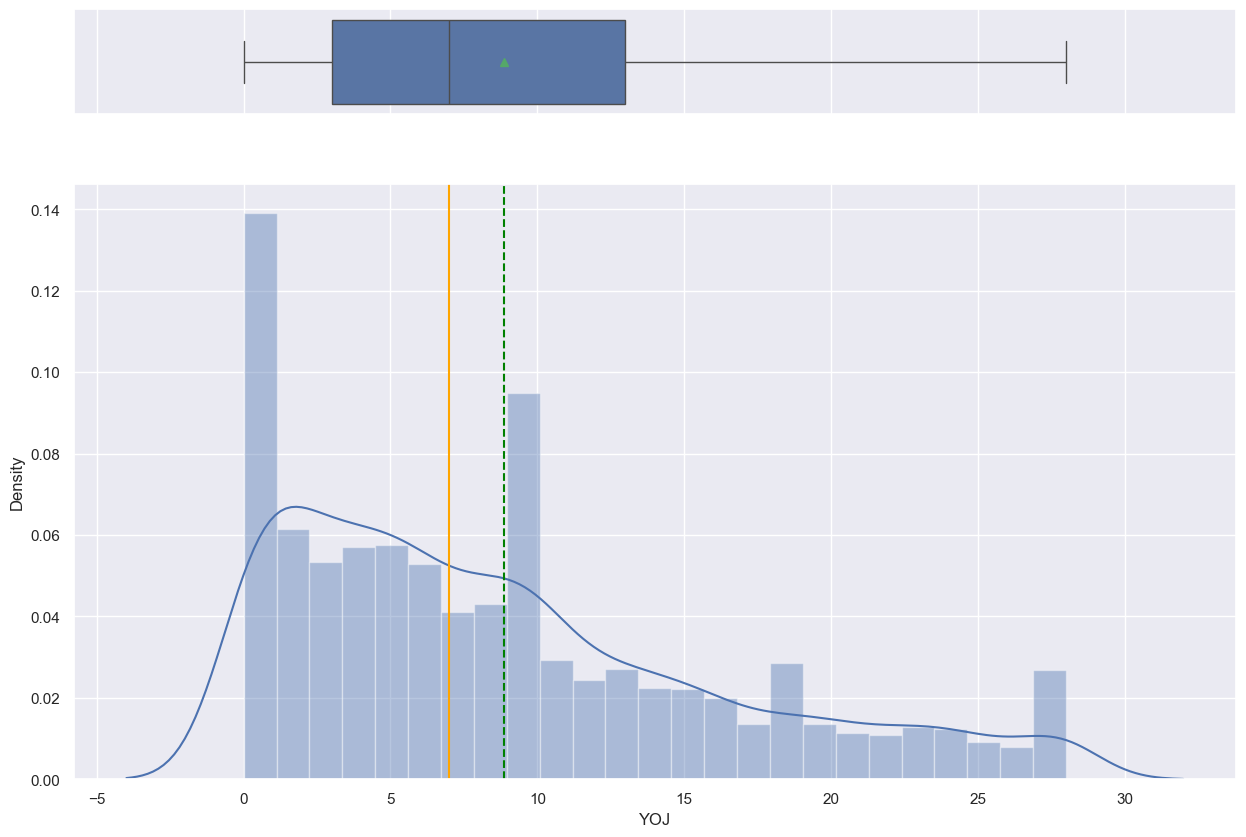

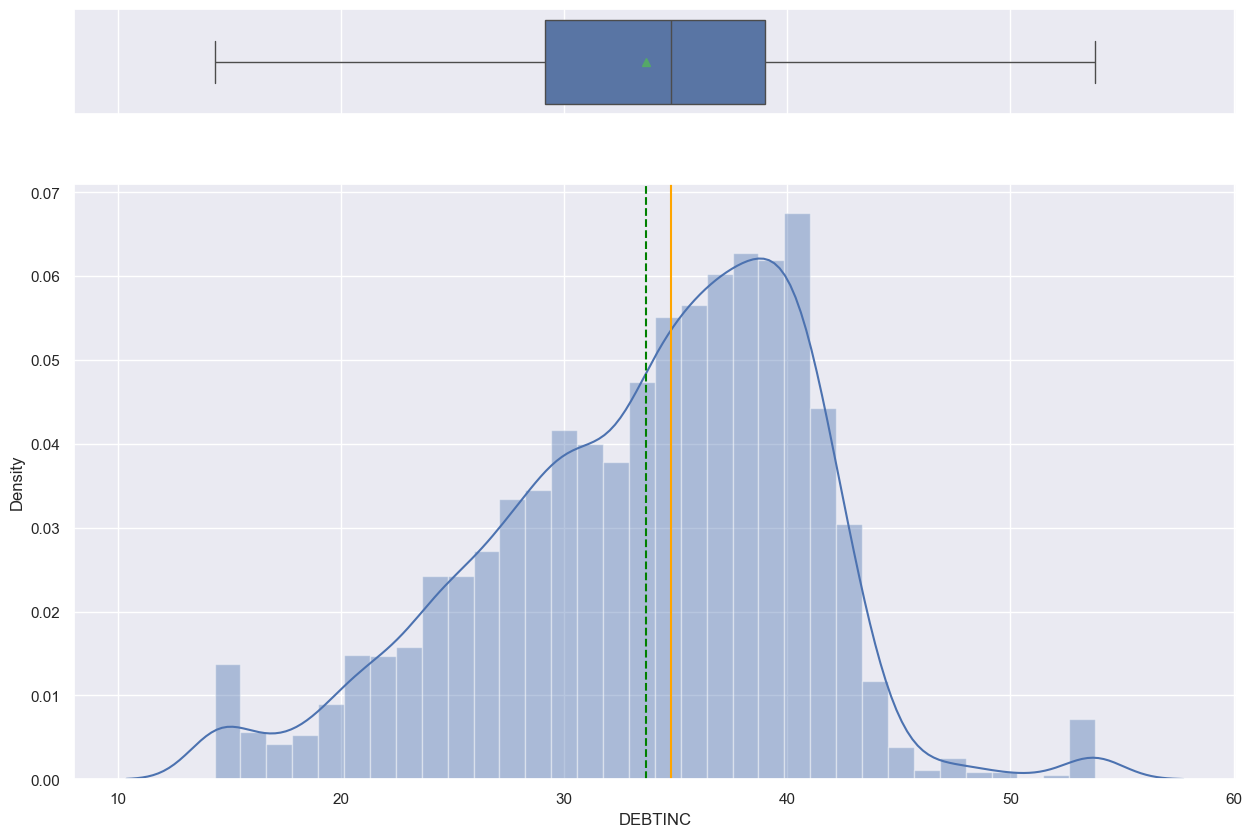

In [35]:
df_hmeq= treat_outliers(df_hmeq,'CLAGE')
hist_box(df_hmeq,'CLAGE')

df_hmeq= treat_outliers(df_hmeq,'YOJ')
hist_box(df_hmeq,'YOJ')

df_hmeq= treat_outliers(df_hmeq,'DEBTINC')
hist_box(df_hmeq,'DEBTINC')

- As shown above, by removing the outliers now the variables `CLAGE`, `YOJ` & `DEBTINC` look more evenly distributed without loosing significant data.

## Treating Missing Values

In [36]:
# Fill numeric columns with median.
numeric_columns = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ','CLAGE',
                   'NINQ','CLNO','DEBTINC']

for i, variable in enumerate(numeric_columns): 
    df_hmeq[variable] = df_hmeq[variable].fillna(df_hmeq[variable].median())
    
# Fill numeric columns with mode.
categorical_columns = ['REASON', 'JOB']

for i, variable in enumerate(categorical_columns): 
    df_hmeq[variable] = df_hmeq[variable].fillna(df_hmeq[variable].mode()[0])

- The missing values were treated by using the median for numerical variables and the mode for categorical variables. 

## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

- The variables with the highest correlation with the target independent variable`BAD`are `DEROG` and `DELINQ`.
- Most of the numerical variables distributions are right-skewed and are close to a normal distribution.
- There is not evidence of strong correlation between the categorical variables and the independent variable `BAD`.
- `DEBTINC` had around 20% of missing values out of its total observations.
- All numerical variables had outliers.
- There is a very strong correlation between the variables `VALUE` and `MORTDUE`.

## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

In [37]:
# Creating dummy variables for the categorical variables

# Creating a list of columns for which we will create dummy variables
to_get_dummies_for = ['REASON', 'JOB']

# Creating dummy variables
df_model= pd.get_dummies(data = df_hmeq, columns = to_get_dummies_for, drop_first = True)

In [38]:
# Separating the independent variables (X) and the dependent variable (Y)

Y = df_model['BAD']
X = df_model.drop(['BAD'], axis = 1)

In [39]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

In [40]:
# Checking the shape of the train and test data
print("Shape of Training set : ", x_train.shape)
print("Shape of Test set : ", x_test.shape)

Shape of Training set :  (4172, 16)
Shape of Test set :  (1788, 16)


### Model Performance Evaluation Functions

In [41]:
#Evaluating Models with confusion matrix.

def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Client Likely to Default', 'Client Likely to Not Default'], yticklabels = ['Client Likely to Default', 'Client Likely to Not Default'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [42]:
#Evaluating Models with recall, precision & accuracy metrics.

def model_performance_classification(model, predictors, target):

    # Predicting using the independent variables
    pred = model.predict(predictors)
    recall = recall_score(target, pred,average = 'macro')                 # To compute recall
    precision = precision_score(target, pred, average = 'macro')              # To compute precision
    acc = accuracy_score(target, pred)                                 # To compute accuracy score

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },

        index = [0],
    )
    return df_perf

In [43]:
#Evaluating Models with cross validation.

from sklearn.model_selection import cross_val_score

def cross_validation(model, x_test, y_test):
    score = cross_val_score(model, x_test, y_test, cv=5)
    return score

In [44]:
#Evaluating important variables.

def Importances(model):
    importances = model.feature_importances_
    columns = X.columns
    importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
    plt.figure(figsize = (13, 13))
    sns.barplot(x=importance_df.Importance,y=importance_df.index)

### Logistic Regression

In [45]:
# Fitting the logistic regression model

LG_Model = LogisticRegression()
LG_Model.fit(x_train,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      3340
           1       0.57      0.02      0.04       832

    accuracy                           0.80      4172
   macro avg       0.68      0.51      0.46      4172
weighted avg       0.76      0.80      0.72      4172



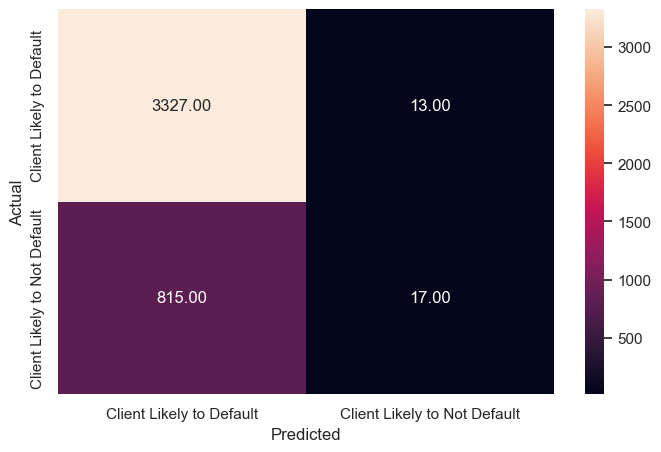

In [46]:
# Checking performance on the training dataset

y_train_pred_dt = LG_Model.predict(x_train)
metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1431
           1       0.74      0.04      0.07       357

    accuracy                           0.81      1788
   macro avg       0.77      0.52      0.48      1788
weighted avg       0.79      0.81      0.73      1788



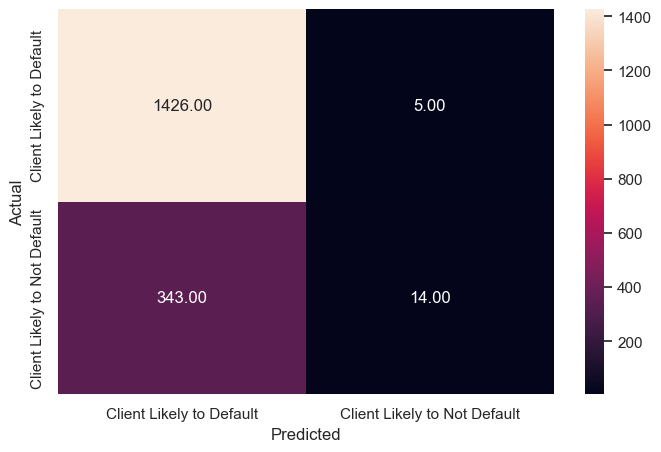

In [47]:
# Checking performance on the test dataset

y_test_pred_dt = LG_Model.predict(x_test)
metrics_score(y_test, y_test_pred_dt)

In [48]:
dtree_test = model_performance_classification(LG_Model,x_test,y_test)
accuracy_LG=dtree_test["Accuracy"].values[0]
scores=cross_validation(LG_Model, x_test, y_test)
print(f"The Precision Metric of this model is {round(dtree_test['Precision'][0]*100,2)}%")
print(f"The Recall Metric of this model is {round(dtree_test['Recall'][0]*100,2)}%")
print(f"The Accuracy Metric of this model is {round(dtree_test['Accuracy'][0]*100,2)}%")
print(f"The Average Score of this model with K-5 Cross validation is {round(np.average(scores)*100,2)}%")

The Precision Metric of this model is 77.15%
The Recall Metric of this model is 51.79%
The Accuracy Metric of this model is 80.54%
The Average Score of this model with K-5 Cross validation is 80.31%


In [49]:
# Printing the coefficients of logistic regression

cols = X.columns
coef_lg = LG_Model.coef_
pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False)

0
DEBTINC         0.018078
CLNO            0.010507
DELINQ          0.008417
DEROG           0.004726
NINQ            0.004722
REASON_HomeImp  0.000309
JOB_Self        0.000171
JOB_Sales       0.000143
JOB_Other       0.000043
VALUE           0.000003
MORTDUE        -0.000008
LOAN           -0.000030
JOB_ProfExe    -0.000295
JOB_Office     -0.000399
YOJ            -0.004307
CLAGE          -0.008111

- The Logistic Regression Algorithm accuracy is around 80% in both training set and test set. There is not evidence of the model overfitting but the accuracy is not very high and one of the metrics (Recall) is as low as 51% when evaluating with the test values. The most significant variable is `DEBTINC` followed by `CLNO` and `DELINQ`

### Decision Tree

In [50]:
# Building a Decision Tree Classifier Model

Model_Tree = DecisionTreeClassifier(random_state=1);
Model_Tree.fit(x_train, y_train)
y_train_pred_dt = Model_Tree.predict(x_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



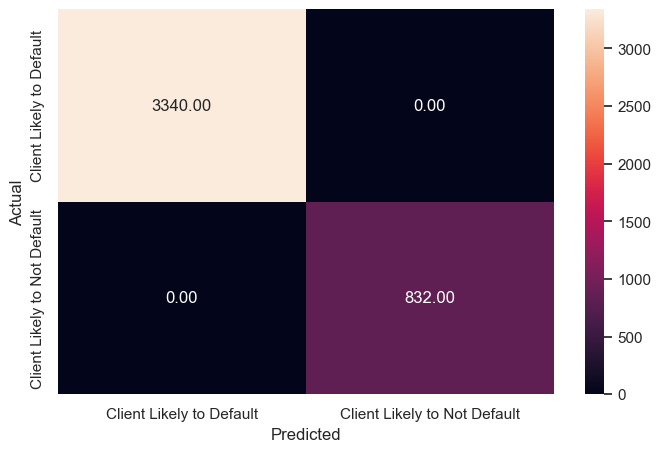

In [51]:
# Checking performance on the training dataset

y_train_pred_dt = Model_Tree.predict(x_train)
metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1431
           1       0.69      0.64      0.66       357

    accuracy                           0.87      1788
   macro avg       0.80      0.78      0.79      1788
weighted avg       0.87      0.87      0.87      1788



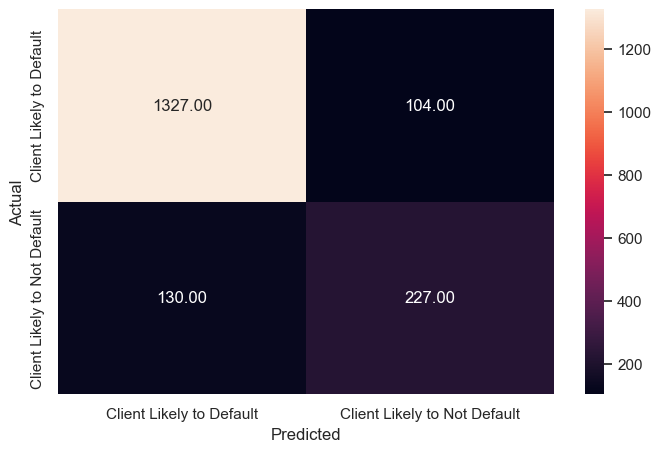

In [52]:
# Checking performance on the test dataset

y_test_pred_dt = Model_Tree.predict(x_test)
metrics_score(y_test, y_test_pred_dt)

In [53]:
dtree_test = model_performance_classification(Model_Tree,x_test,y_test)
accuracy_tree=dtree_test["Accuracy"].values[0]
scores=cross_validation(Model_Tree, x_test, y_test)
print(f"The Precision Metric of this model is {round(dtree_test['Precision'][0]*100,2)}%")
print(f"The Recall Metric of this model is {round(dtree_test['Recall'][0]*100,2)}%")
print(f"The Accuracy Metric of this model is {round(dtree_test['Accuracy'][0]*100,2)}%")
print(f"The Average Score of this model with K-5 Cross validation is {round(np.average(scores)*100,2)}%")

The Precision Metric of this model is 79.83%
The Recall Metric of this model is 78.16%
The Accuracy Metric of this model is 86.91%
The Average Score of this model with K-5 Cross validation is 82.89%


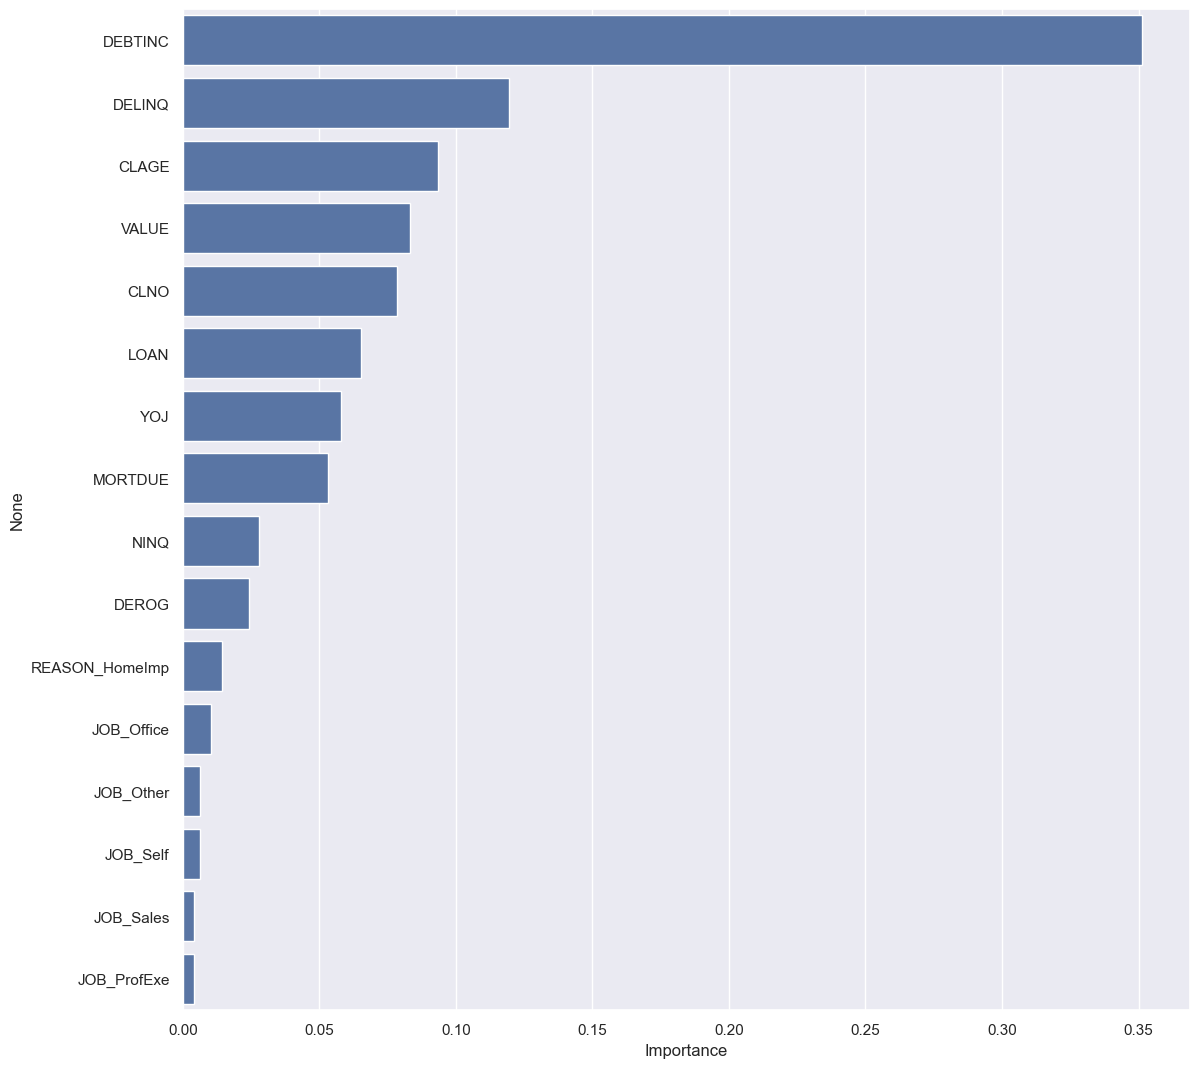

In [54]:
Importances(Model_Tree)

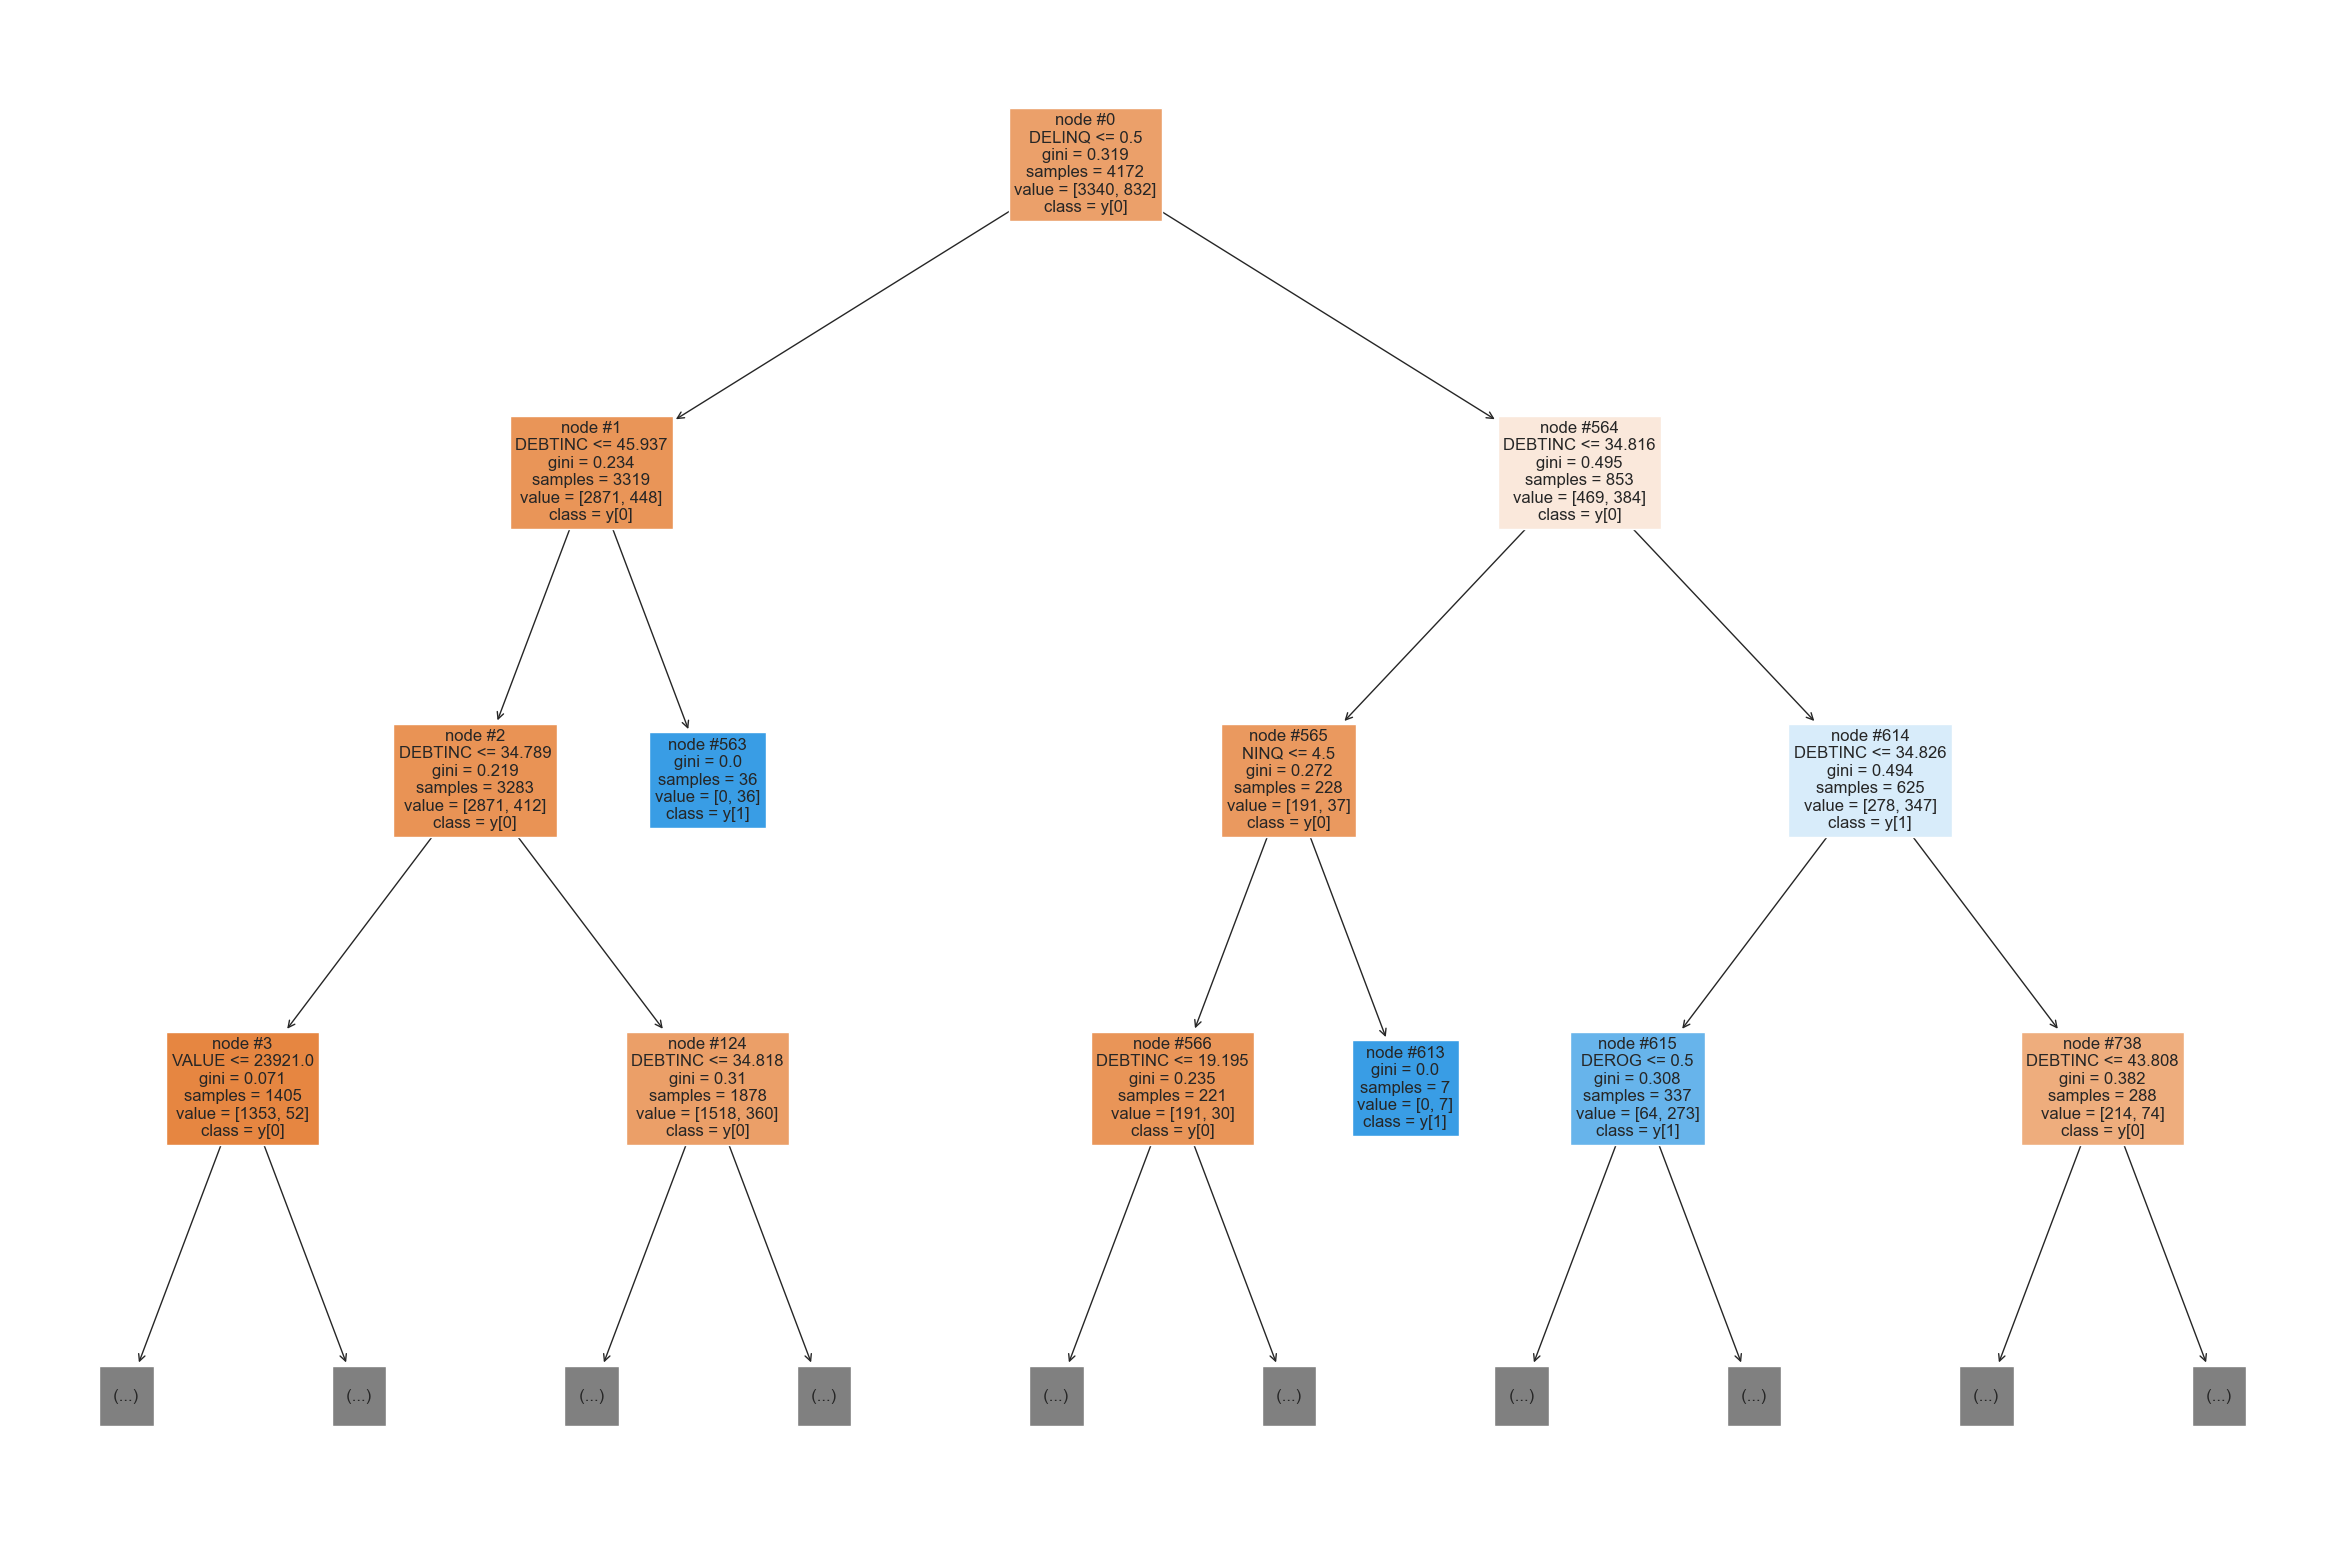

In [55]:
# Plotting the Desicion Tree

features = list(X.columns)
plt.figure(figsize = (30, 20))
tree.plot_tree(Model_Tree, max_depth = 3, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)
plt.show()

- The Decision Tree model has an accuracy of 100% against the training set, this is a sign that the model may be overfitting the training values.
- The Decision Tree model has an accuracy of 86.91% against the test set.
- The most significant variable for the model is `DEBTINC`, followed by `DELINQ` and `CLAGE`.
- The Desicion Tree plot suggests that customers with over 35 in Debt to Income are more likely to default.

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [56]:
#Using GridSearch for Hyperparameter Tuning

# Choose the type of classifier
Model_Tree_Tuning = DecisionTreeClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(Model_Tree_Tuning, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
Model_Tree_Tuning = gridCV.best_estimator_

# Fit the best estimator to the data
Model_Tree_Tuning.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, max_depth=6,
                       min_samples_leaf=25, random_state=1)

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      3340
           1       0.55      0.88      0.68       832

    accuracy                           0.83      4172
   macro avg       0.76      0.85      0.78      4172
weighted avg       0.88      0.83      0.85      4172



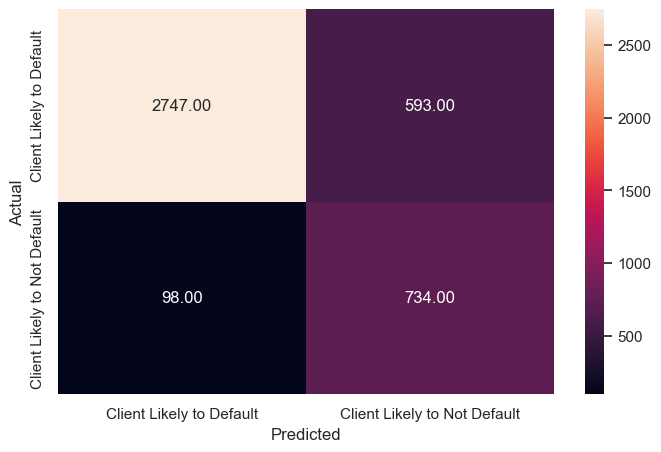

In [57]:
# Checking performance on the training dataset

y_train_pred_dt = Model_Tree_Tuning.predict(x_train)
metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.95      0.81      0.88      1431
           1       0.53      0.82      0.64       357

    accuracy                           0.82      1788
   macro avg       0.74      0.82      0.76      1788
weighted avg       0.86      0.82      0.83      1788



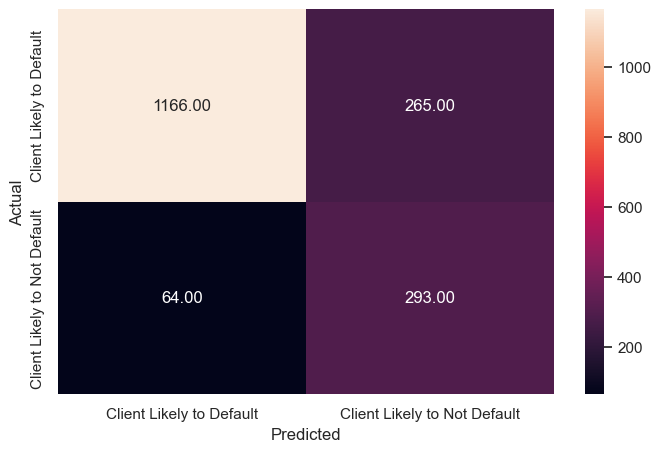

In [58]:
# Checking performance on the test dataset

y_test_pred_dt = Model_Tree_Tuning.predict(x_test)
metrics_score(y_test, y_test_pred_dt)

In [59]:
dtree_test = model_performance_classification(Model_Tree_Tuning,x_test,y_test)
accuracy_tree_tuned=dtree_test["Accuracy"].values[0]
scores=cross_validation(Model_Tree_Tuning, x_test, y_test)
print(f"The Precision Metric of this model is {round(dtree_test['Precision'][0]*100,2)}%")
print(f"The Recall Metric of this model is {round(dtree_test['Recall'][0]*100,2)}%")
print(f"The Accuracy Metric of this model is {round(dtree_test['Accuracy'][0]*100,2)}%")
print(f"The Average Score of this model with K-5 Cross validation is {round(np.average(scores)*100,2)}%")

The Precision Metric of this model is 73.65%
The Recall Metric of this model is 81.78%
The Accuracy Metric of this model is 81.6%
The Average Score of this model with K-5 Cross validation is 78.75%


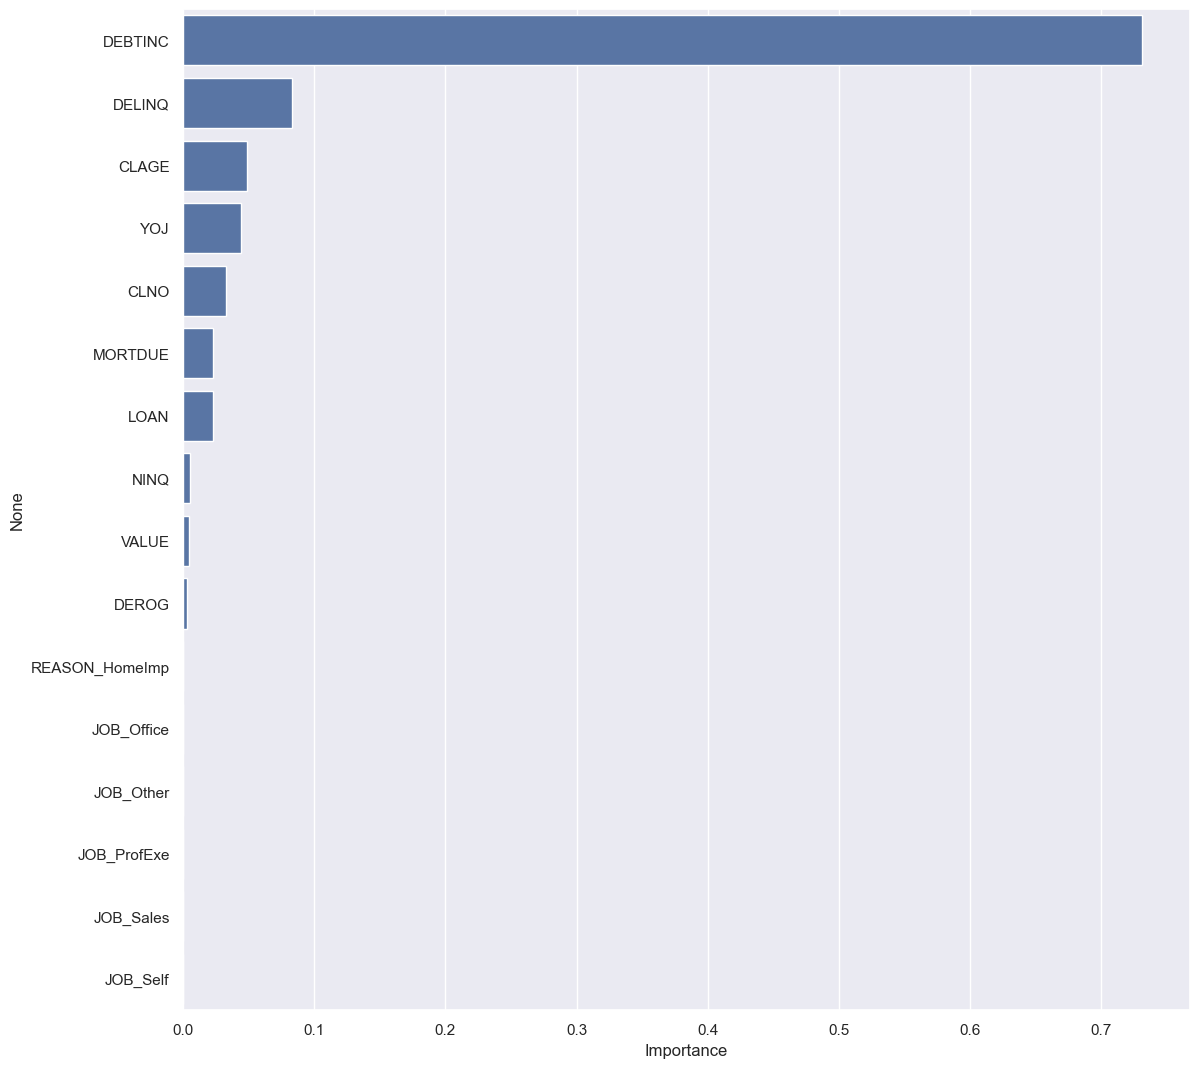

In [60]:
Importances(Model_Tree_Tuning)

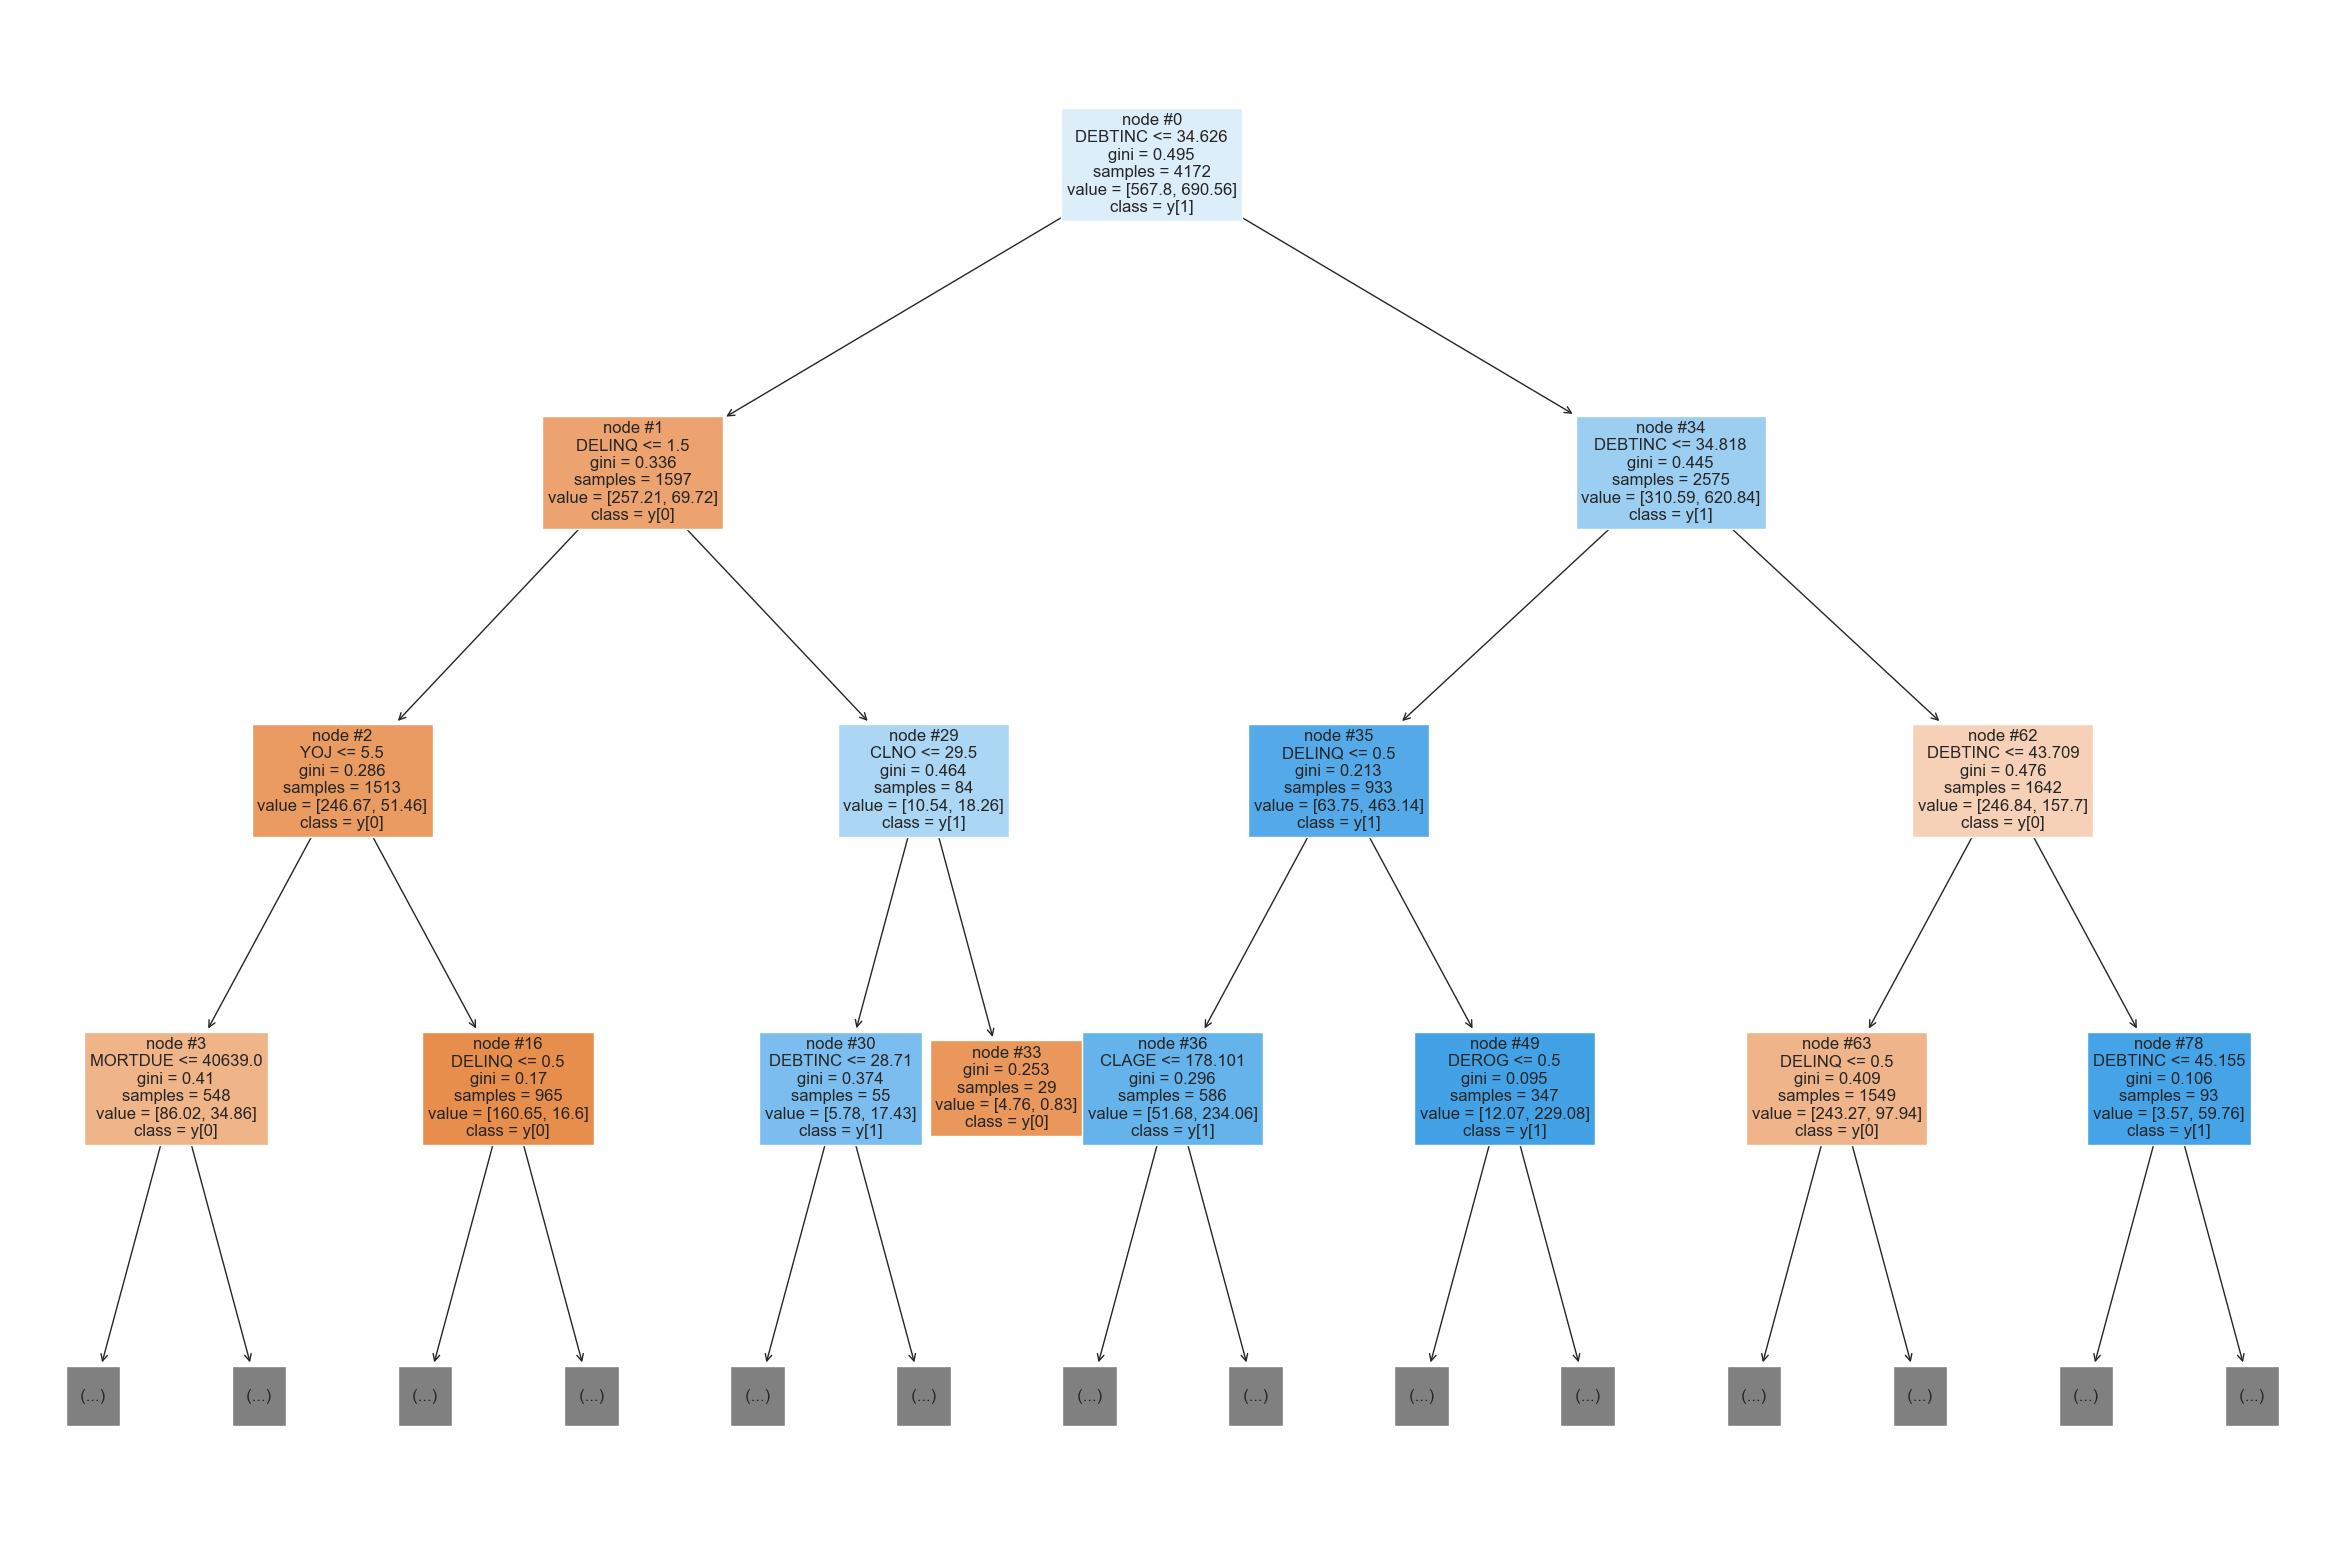

In [61]:
# Plotting the Desicion Tree

features = list(X.columns)
plt.figure(figsize = (30, 20))
tree.plot_tree(Model_Tree_Tuning, max_depth = 3, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)
plt.show()

- The Tuned Decision Tree model has an accuracy of 83% against the training set, the model is overfitting less the training values than the Desicion Tree without tuning.
- The Tuned Decision Tree model has an accuracy of 81.6% against the test set.
- The most significant variable for the tuned model is `DEBTINC`, followed by `DELINQ` and `CLAGE`.
- The Tuned Desicion Tree plot suggests that customers with over 35 in Debt to Income are more likely to default.

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [62]:
# Fitting the Random Forest classifier on the training data
RF_Model = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)
RF_Model.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



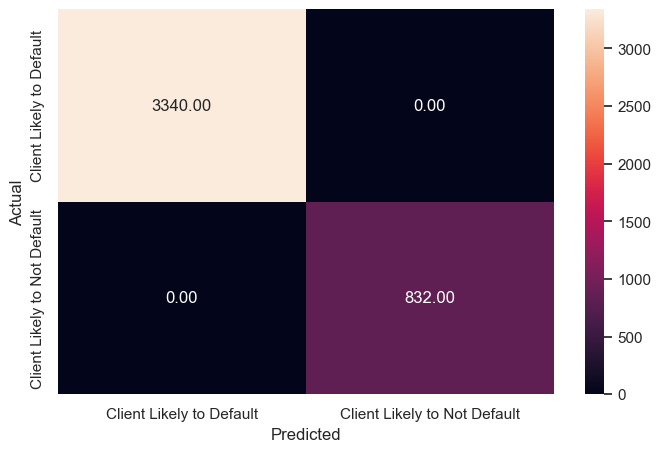

In [63]:
# Checking performance on the training dataset

y_train_pred_dt = RF_Model.predict(x_train)
metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1431
           1       0.87      0.61      0.71       357

    accuracy                           0.90      1788
   macro avg       0.89      0.79      0.83      1788
weighted avg       0.90      0.90      0.90      1788



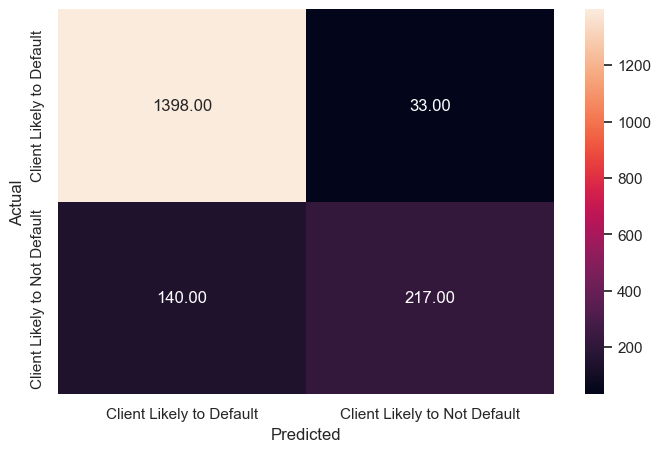

In [64]:
# Checking performance on the test dataset

y_test_pred_dt = RF_Model.predict(x_test)
metrics_score(y_test, y_test_pred_dt)

In [65]:
dtree_test = model_performance_classification(RF_Model,x_test,y_test)
accuracy_RF_Model=dtree_test["Accuracy"].values[0]
scores=cross_validation(RF_Model, x_test, y_test)
print(f"The Precision Metric of this model is {round(dtree_test['Precision'][0]*100,2)}%")
print(f"The Recall Metric of this model is {round(dtree_test['Recall'][0]*100,2)}%")
print(f"The Accuracy Metric of this model is {round(dtree_test['Accuracy'][0]*100,2)}%")
print(f"The Average Score of this model with K-5 Cross validation is {round(np.average(scores)*100,2)}%")

The Precision Metric of this model is 88.85%
The Recall Metric of this model is 79.24%
The Accuracy Metric of this model is 90.32%
The Average Score of this model with K-5 Cross validation is 87.47%


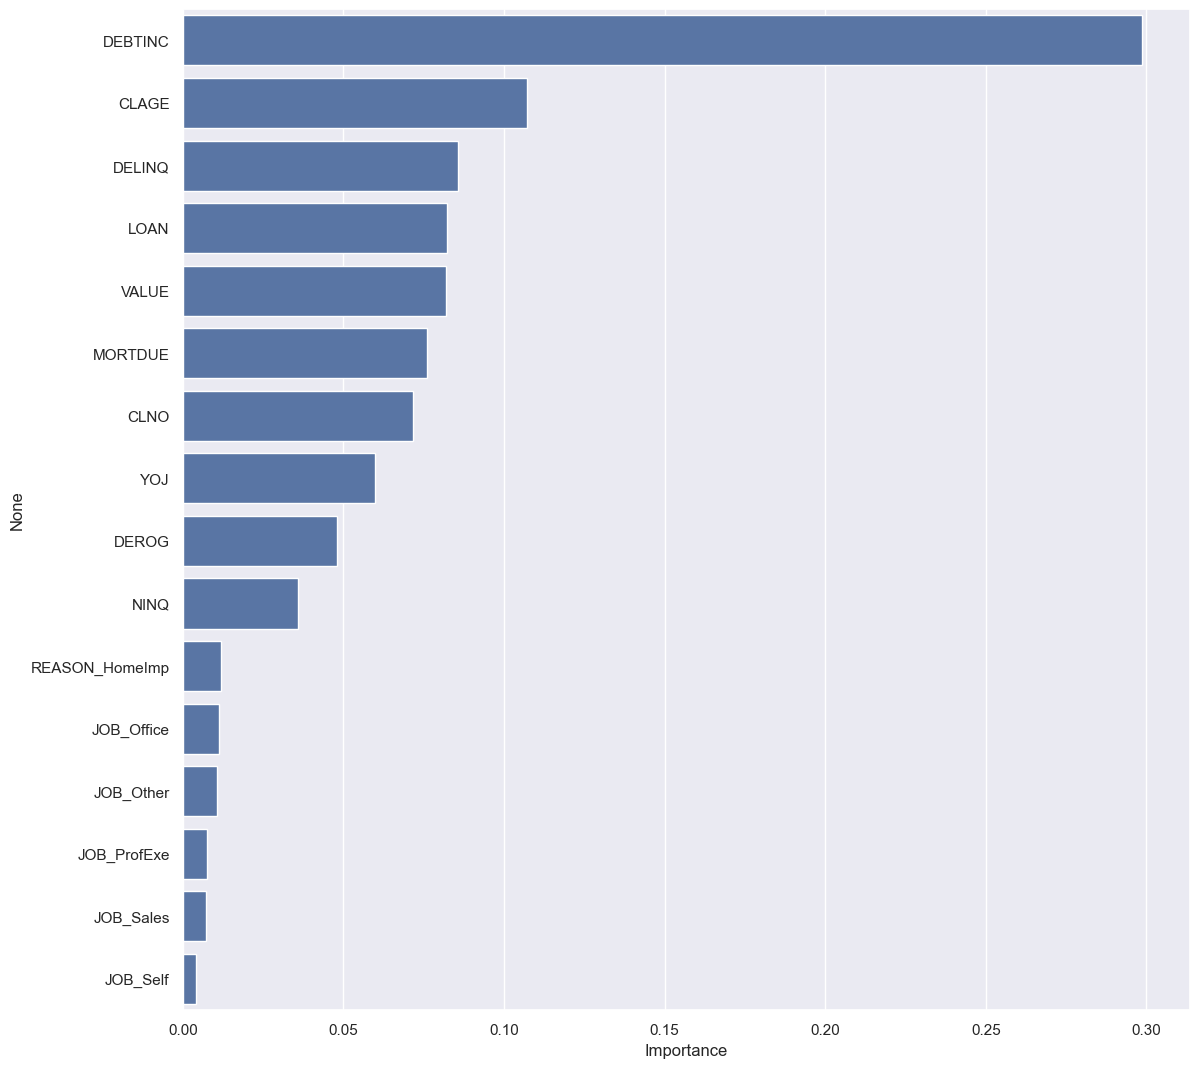

In [66]:
Importances(RF_Model)

- The Random Forest model has an accuracy of 100% against the training set, this is a sign that the model may be overfitting the training values.
- The Random Forest model has an accuracy of 90.32% against the test set.
- The most significant variable for the Random Forest model is `DEBTINC`, followed by `CLAGE` and `DELINQ`.

### **Random Forest Classifier Hyperparameter Tuning**

In [67]:
# Tuning the Random Forest classifier

# Choose the type of classifier
RF_Model_Tuning = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

# Grid of parameters to choose from
params_rf = {
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(RF_Model_Tuning, params_rf, scoring = scorer, cv = 5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
RF_Model_Tuning = grid_obj.best_estimator_

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3340
           1       0.91      0.99      0.95       832

    accuracy                           0.98      4172
   macro avg       0.96      0.99      0.97      4172
weighted avg       0.98      0.98      0.98      4172



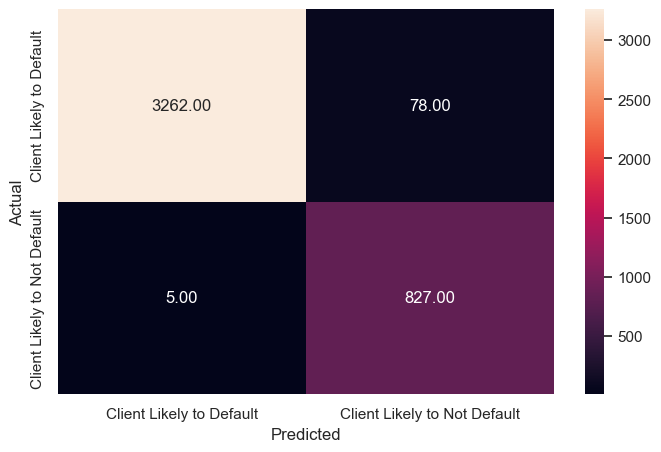

In [68]:
# Checking performance on the training dataset

y_train_pred_dt = RF_Model_Tuning.predict(x_train)
metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1431
           1       0.80      0.72      0.76       357

    accuracy                           0.91      1788
   macro avg       0.86      0.84      0.85      1788
weighted avg       0.91      0.91      0.91      1788



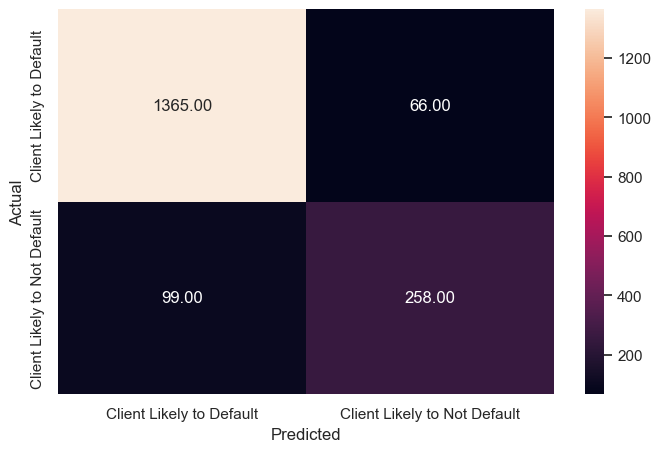

In [69]:
# Checking performance on the test dataset

y_test_pred_dt = RF_Model_Tuning.predict(x_test)
metrics_score(y_test, y_test_pred_dt)

In [73]:
dtree_test = model_performance_classification(RF_Model_Tuning,x_test,y_test)
accuracy_RF_Model_tuned=dtree_test["Accuracy"].values[0]
scores=cross_validation(RF_Model_Tuning, x_test, y_test)
print(f"The Precision Metric of this model is {round(dtree_test['Precision'][0]*100,2)}%")
print(f"The Recall Metric of this model is {round(dtree_test['Recall'][0]*100,2)}%")
print(f"The Accuracy Metric of this model is {round(dtree_test['Accuracy'][0]*100,2)}%")
print(f"The Average Score of this model with K-5 Cross validation is {round(np.average(scores)*100,2)}%")

The Precision Metric of this model is 86.43%
The Recall Metric of this model is 83.83%
The Accuracy Metric of this model is 90.77%
The Average Score of this model with K-5 Cross validation is 88.82%


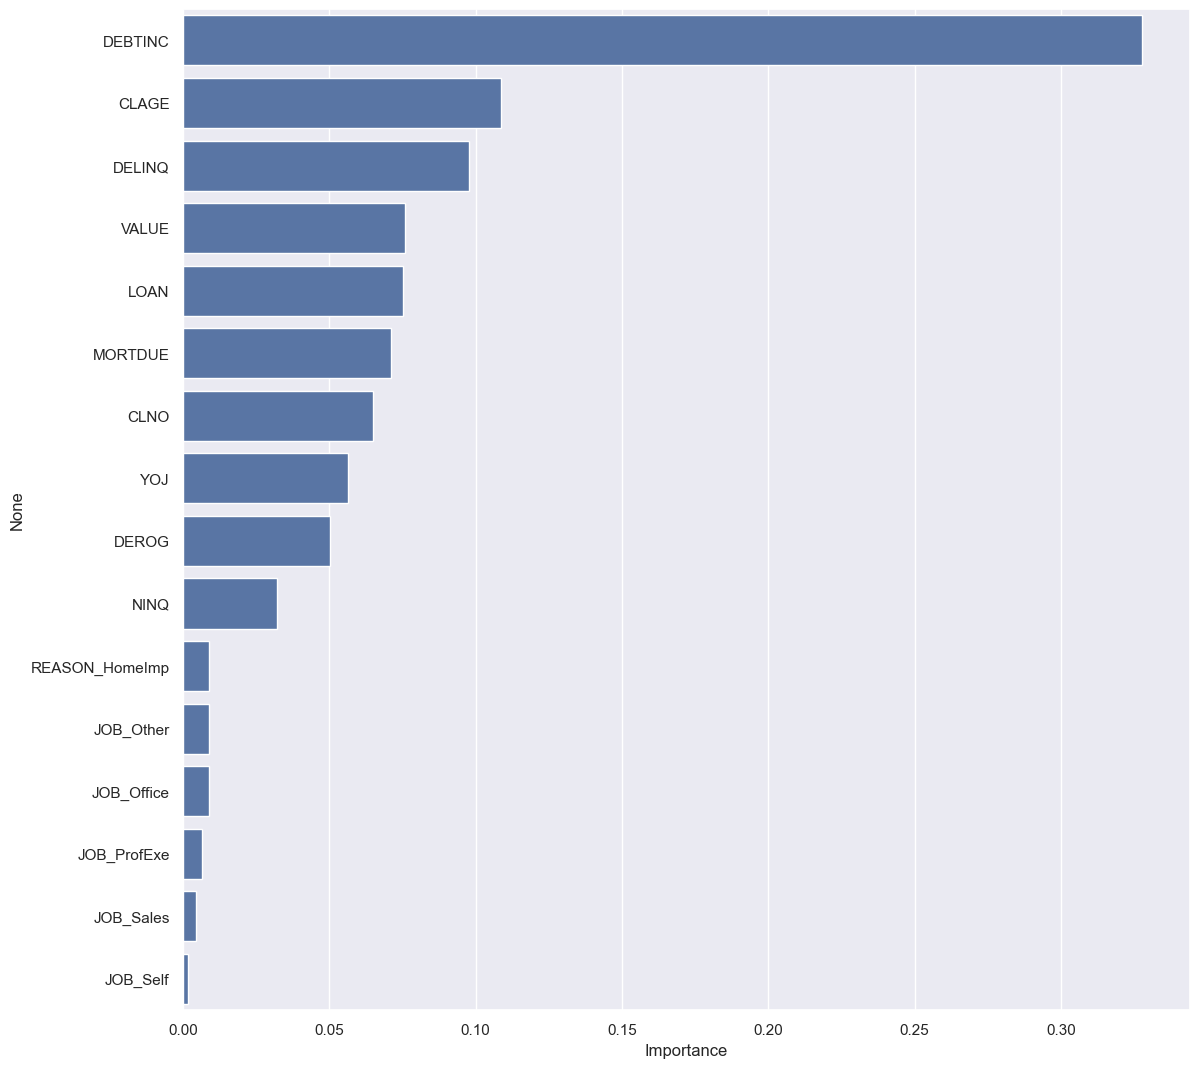

In [74]:
Importances(RF_Model_Tuning)

- The Tuned Random Forest model has an accuracy of 98% against the training set, the model is slightly overfitting less the training values than the Random Forest without tuning.
- The Tuned Random Forest model has an accuracy of 90.77% against the test set.
- The most significant variable for the Tuned Random Forest model is `DEBTINC`, followed by `CLAGE` and `DELINQ`.

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 

- The machine learning method with the lowest scores is Logistic Regression. Then, the Desicion Tree method has better scores than the Logistic Regression and its tuned version.
- The machine learning method with the highest scores is the tuned version of random forest which improves slightly the original Random Forest version.
- The Tuned Random Forest model has an accuracy of 90.77% against the test set, and there is still room for improvement.

In [93]:
x = ["Logistic Regression", "Decision Tree","Tuned Decision Tree","Random Forest","Tuned Random Forest"]
y = [round(accuracy_LG*100,2), round(accuracy_tree*100,2), round(accuracy_tree_tuned*100,2), round(accuracy_RF_Model*100,2), round(accuracy_RF_Model_tuned*100,2)]

a=pd.DataFrame(data=y, index=x, columns=['Percentage'])

a

Percentage
Logistic Regression       80.54
Decision Tree             86.91
Tuned Decision Tree       81.60
Random Forest             90.32
Tuned Random Forest       90.77

<AxesSubplot:>

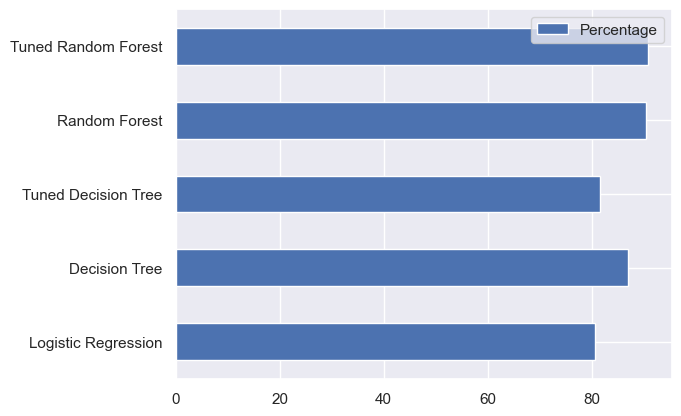

In [95]:
a.plot.barh()

**2. Refined insights:** 

- `DEBTINC` was the most significant variable for all models, meaning the data colected of Debt to Income is being used to predict if the customer will default with a higher accuracy. However, it was also the variable with the most missing values. My recommendation would be to collect more data of Debt to Income from present and future customers, in order to improve the machine learning model accuracy.
- `CLAGE` and `DELINQ` are also significant variables for the model, which refer to the customer past behaviour with credit lines.
- The categorical variables `JOB` and `REASON` are the less significant for the model.
- I would recommend to alocate more resources for the underwriting process in verifying data of the most signifacnt variables previously mentioned.

**3. Proposal for the final solution design:** 

- My recommendation would be using the Tuned Random Forest algorithm to predict the likelihood of a potential customer to default in their loan,  which showed to have the highest Recall, Accuracy and Cross Validation metrics out of all the other models. I would also collect more data and retrain the model periodically and evaluate its performance.

### **Problem and Solution Summary**

Retail banks heavily depend on interest income from home loans but the risk of loan defaulters poses a significant threat to bank profits. In the past, the bank would utilize heuristics to determine loan approval, however the process was often affected by human error and bias. For such reason, this project proposes the use of machine learning to improves the desicion making process to approve or deny a loan for an applicant depending on their creditworthiness.

The model chosen was the Tuned Random Forest model that achieved an accuracy of 90.77% on the test set. When comparing the models predictions against the test set only 66 out of 1,788 applicants predicted as unlikely to default actually defaulted, this represents less than 4% of all cases which is really good having in consideration that the scenario mentioned is considered the one that would generate the most economic losses to the bank.

### **Recommendations for implementation**

The following are the recommendations suggested when the Tuned Random Forest algorithm is already being used day to day in the decision making process to approve or deny a loan for a customer:

1. The continuos refinement of the algorithm is crucial for the success of this solution. Regular data collection and periodic retraining of the model will ensure its adaptability to changing market dynamics and evolving customer behaviors.

2. By utilizing the model, the bank minimizes human error and bias in the loan approval process which follows the regulatory guidelines of the "Equal Credit Opportunity Act".

3. Allocating resources to collect Debt-to-Income ratio information from customers is recommended, as it is the most significant variable for identifying potential defaulters. Conversely, variables like the customer's job and loan request reason were found to be less influential.

4. Variables related to customers' credit and financial histories (e.g., DELINQ, DEROG, CLAGE) were shown to be highly relevant in the model but also had a significant amount of missing values. Improving the data collection process to minimize missing values for these key variables is advised.
